# REAL ESTATE ANALYSIS: BEST MILAN NEIGHBORHOODS WHERE TO BUY/RENT YOUR HOUSE
## Capstone Project - The Battle of Neighborhoods
by Federica Gadda, 12/05/2020 <br />
contact: federica.gadda1@gmail.com

<img src="https://www.hotelalgamilano.it/sites/alga2torri.gisnet.it/files/Hotel_Santa_Barbara_Milano_01t.jpg">

# Table of Content 

1. [<b>Introduction</b>](#introduction)
2. [<b>Data</b>](#Data) <br />
3. [<b>Methodology and results</b>](#Methodology) <br />
   3.1 [<b>Data retrieval, cleaning and exploration</b>](#retrieval) <br />
      3.1.1 [Milan boroughs dataset and house market and rental values dataset](#Borough) <br />
      3.1.2 [Geo-locational information of the neighborhoods](#Location) <br />
      3.1.3 [Surrounding venues of each neighborhoods](#Venues) <br />
    3.2 [<b>Map of Milan neighborhoods</b>](#Milan_map) <br />
    3.3 [<b>Comparison of the market and the rental values across each Milan borough and the housing type/condition</b>](#comparison_zone) <br />
    3.4 [<b>Determination of the correlation between the distance of the house from the city center and average home value](#correlation) <br />
      3.4.1 [Box plots: average market/rental values of housing types and the related conditions, considering the Milan areas](#box_plot) <br />
      3.4.2 [Regression](#regression) <br/>
    3.5 [<b>Venues analysis</b>](#venue_analysis) <br/>
4. [<b>Discussion</b>](#discussion)
5. [<b>Conclusion</b>](#conclusion)

# 1. Introduction <a name="introduction"></a>

Milan is a city in northern Italy, capital of Lombardy, and the second-most populous city in Italy after Rome. 
The official estimated population of the City of Milan was 1.4 million as of 01 January 2019, according to ISTAT, the official Italian statistical agency ([source](http://dati.istat.it/Index.aspx?lang=en&SubSessionId=31b04bfa-342d-4687-8fdd-3c7cb14aad3f)).<br />
Milan is considered a leading global city, with strengths in the field of the art, commerce, design, education, entertainment, fashion, finance, healthcare, media, services, research and tourism. The city has been recognized as one of the world's four fashion capitals thanks to several international events and fairs, including Milan Fashion Week and the Milan Furniture Fair, which are currently among the world's biggest in terms of revenue, visitors and growth. It hosts numerous cultural institutions, academies and universities. <br />
Whereas Rome is Italy's political capital, Milan is the country's industrial and financial heart. In 2019 GDP per-capita of Milan is estimated at €49.000, steadily increasing, and significantly higher that the Italian average of €26.000 ([source](https://www.assolombarda.it/media/comunicati-stampa/rassegna-stampa-osservatorio-milano-2019-7-novembre-2019)). <br />
Milan is the destination of 11 million visitors in 2019 (as reported in the city website ([source](https://www.comune.milano.it/-/turismo.-nel-2019-sfiorati-11-milioni-di-visitatori)), attracted by its museums and art galleries, that include some of the most important collections in the world, like the major works by Leonardo da Vinci. The city is served by many luxury hotels and dreamy restaurants. <br />
last but not least, Milan will host the 2026 Winter Olympics together with Cortina d'Ampezzo. <br />
In short, if you are looking for a city to live in with events of every kind, where you will divinely eat and where you will never be bored, Milan is right for you!

The goal of this project is to help people who want to buy or to rent house in Milan, finding the characteristics of each neighborhood in terms of house prices and relevant venues in the surrounding area (like restaurants, gyms, parks...). By using data science methods and machine learning method, like clustering, this project will answer to the following question: if you want to move to Milan, what is the better neighborhood for you, according to your financial resources and your interests?

# 2. Data <a name="Data"></a>

The data for this project has been retrieved from multiple sources, paying the utmost attention to the reliability of them. For this reason, the data was collected from:
1. [Milan borough dataset](#Borough) and [house market and rental values dataset](#Values): retrieved from the Italian Revenue Agency website ([source](https://www.agenziaentrate.gov.it/portale/schede/fabbricatiterreni/omi/banche-dati/quotazioni-immobiliari)), where the Milan borough list and the information about the market values and the rental values of the houses have been found, related to the 2nd half of 2019, depending on the house location and the state of the property. <br /> In order to access to the CSV file, it's necessary to register to the website.
2. [Geo-locational information of Milan city center and the neighborhoods](#Location): thanks to Google Maps Geocoding API, it was possible to retrieve the geo-locational information (latitude and longitude) of Milan city center and the neighborhoods.
3. [Surrounding venues for each neighborhood](#Venues): obtained using FourSquare API platform.

These data have allowed to explore and achieve to the goal of this project. The neighborhood data has made possible to determine the value of the house, on the basis of the borough position and the state of the property. Neighborhoods locations have been fundamental understand the correlation between the neighborhood positions (in terms of distance from the Milan city center) and the value of the houses. These positions, together with venues data, have been essential to determinate the clusters and identify the most common venues for each of them.

# 3. Methodology and results <a name="Methodology"></a>

This section will illustrate the overall methodology that has been involved in this project.  
The methodology will include:
- data retrieval, cleaning and exploration.
- Visualization of the neighborhoods’ location, thanks by Folium library.
- Understand the correlation between market and rental values and the house values; through bar-plots, box-plots and regression.
- Determine the most common venues for each cluster. It has been made by performing K-means clustering algorithm to segment neighborhoods, based on the frequencies of the venues. 

## 3.1 Data retrieval, cleaning and exploration <a name='retrieval'></a>

The first and important step in data science is the data retrieval; indeed, there aren’t reliable and precise analysis without using the best data and the most appropriate technique and algorithms. <br/>
This analysis starts with the data collection and cleaning, in order to get all the essential data to achieve the goal of this study.

### Download libraries

In [20]:
# !pip install Folium
# !pip install geopy
# !pip install haversine
# !pip install wordcloud

In [21]:
import requests
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import numpy as np
from scipy.optimize import curve_fit

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('chained',None) 
pd.set_option('display.max_rows', None)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

## 3.1.1 Milan boroughs dataset and house market and rental values datasets <a name="Borough"></a>

### <u>Milan boroughs dataset</u>

### Upload the csv files where are listed the Milan boroughs

In [22]:
url_neighborhoods = "https://raw.githubusercontent.com/Aciredef29/Applied-Data-Science-Capstone-exam/master/Milan%20Neighborhood.csv"
page = requests.get(url_neighborhoods)
if page.status_code == 200:
    print('Page download successful')
else:
    print('Page download error. Error code: {}'.format(page.status_code))

Page download successful


In [23]:
neighborhoods=pd.read_csv(url_neighborhoods, sep=';')
neighborhoods.head()

,Area_territoriale,Regione,Prov,Comune_ISTAT,Comune_cat,Sez,Comune_amm,Comune_descrizione,Fascia,Zona_Descr,Zona,LinkZona,Cod_tip_prev,Descr_tip_prev,Stato_prev,Microzona
0,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,NaN,F205,MILANO,B,"'CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLE...",B12,MI00003228,20,Abitazioni civili,N,2
1,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,NaN,F205,MILANO,B,'CENTRO STORICO -UNIVERSITA STATALE',B13,MI00003232,20,Abitazioni civili,N,3
2,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,NaN,F205,MILANO,B,'CENTRO STORICO - BRERA',B15,MI00003544,20,Abitazioni civili,O,0
3,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,NaN,F205,MILANO,B,"'CENTRO STORICO -SANT`AMBROGIO, CADORNA, VIA D...",B16,MI00003545,20,Abitazioni civili,O,0
4,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,NaN,F205,MILANO,B,"'PARCO SEMPIONE, ARCO DELLA PACE'",B17,MI00004767,20,Abitazioni civili,N,0


### Drop the not needed columns 

we need only the names of the boroughs and the related code.

In [24]:
neighborhoods = neighborhoods.drop(['Area_territoriale','Regione', 'Prov', 'Comune_ISTAT', 'Comune_cat', 'Sez', 'Comune_amm', 'Comune_descrizione', 'Fascia', 'LinkZona', 'Cod_tip_prev', 'Descr_tip_prev', 'Stato_prev', 'Microzona'], axis=1) 
neighborhoods.head()

,Zona_Descr,Zona
0,"'CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLE...",B12
1,'CENTRO STORICO -UNIVERSITA STATALE',B13
2,'CENTRO STORICO - BRERA',B15
3,"'CENTRO STORICO -SANT`AMBROGIO, CADORNA, VIA D...",B16
4,"'PARCO SEMPIONE, ARCO DELLA PACE'",B17


### Translate the column names in english

In [25]:
neighborhoods.rename(columns={'Zona_Descr' : 'Boroughs', 'Zona' : 'Borough code'}, inplace=True)
neighborhoods.head()

,Boroughs,Borough code
0,"'CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLE...",B12
1,'CENTRO STORICO -UNIVERSITA STATALE',B13
2,'CENTRO STORICO - BRERA',B15
3,"'CENTRO STORICO -SANT`AMBROGIO, CADORNA, VIA D...",B16
4,"'PARCO SEMPIONE, ARCO DELLA PACE'",B17


### Drop quotes in Boroughs column

In [26]:
neighborhoods['Boroughs'].replace("'", "", regex=True, inplace=True)
neighborhoods.head()

,Boroughs,Borough code
0,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12
1,CENTRO STORICO -UNIVERSITA STATALE,B13
2,CENTRO STORICO - BRERA,B15
3,"CENTRO STORICO -SANT`AMBROGIO, CADORNA, VIA DANTE",B16
4,"PARCO SEMPIONE, ARCO DELLA PACE",B17


### <u>House market and rental values datasets <a name="Values"></a></u>

### Upload the csv files where are listed the Milan house market and rental values

In [27]:
url_values = "https://raw.githubusercontent.com/Aciredef29/Applied-Data-Science-Capstone-exam/master/Market%20values%20of%20house%20in%20Milan.csv"
page = requests.get(url_values)
if page.status_code == 200:
    print('Page download successful')
else:
    print('Page download error. Error code: {}'.format(page.status_code))

Page download successful


In [28]:
values=pd.read_csv(url_values, sep=';')
values.head()

,Area_territoriale,Regione,Prov,Comune_ISTAT,Comune_cat,Sez,Comune_amm,Comune_descrizione,Fascia,Zona,...,Cod_Tip,Descr_Tipologia,Stato,Stato_prev,Compr_min,Compr_max,Sup_NL_compr,Loc_min,Loc_max,Sup_NL_loc
0,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,...,20,Abitazioni civili,OTTIMO,NaN,9000,12300,L,28,"37,5",L
1,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,...,20,Abitazioni civili,NORMALE,P,7400,9000,L,23,28,L
2,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,...,21,Abitazioni di tipo economico,NORMALE,P,6500,7800,L,18,22,L
3,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,...,21,Abitazioni di tipo economico,OTTIMO,NaN,7800,9000,L,24,30,L
4,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,...,19,Abitazioni signorili,OTTIMO,P,11200,14300,L,"37,5",46,L


### Drop the not needed columns 

We only need  the borough codes, housing type descriptions, the state of the property and, finally, the information about the market and the rental values of the houses.

In [29]:
values = values.drop(['Area_territoriale', 'Regione', 'Prov', 'Comune_ISTAT', 'Comune_cat', 'Sez', 'Comune_amm', 'Comune_descrizione', 'Fascia', 'LinkZona', 'Cod_Tip', 'Stato_prev', 'Sup_NL_compr', 'Sup_NL_loc'], axis=1) 
values.head()

,Zona,Descr_Tipologia,Stato,Compr_min,Compr_max,Loc_min,Loc_max
0,B12,Abitazioni civili,OTTIMO,9000,12300,28,"37,5"
1,B12,Abitazioni civili,NORMALE,7400,9000,23,28
2,B12,Abitazioni di tipo economico,NORMALE,6500,7800,18,22
3,B12,Abitazioni di tipo economico,OTTIMO,7800,9000,24,30
4,B12,Abitazioni signorili,OTTIMO,11200,14300,"37,5",46


### Select only the row for residential and stately homes 

the dataframe shows also the values of not living houses: 
- economical accommodation;
- box;
- warehouses; 
- shops; 
- offices;
- laboratories.

In [30]:
house_type = ['Abitazioni civili', 'Abitazioni signorili'] 
values = values.loc[values['Descr_Tipologia'].isin(house_type)]
values.head()

,Zona,Descr_Tipologia,Stato,Compr_min,Compr_max,Loc_min,Loc_max
0,B12,Abitazioni civili,OTTIMO,9000,12300,28,"37,5"
1,B12,Abitazioni civili,NORMALE,7400,9000,23,28
4,B12,Abitazioni signorili,OTTIMO,11200,14300,"37,5",46
12,B13,Abitazioni civili,OTTIMO,6900,8200,"18,5","27,3"
13,B13,Abitazioni civili,NORMALE,5000,6900,"14,5","18,5"


### Translate the column names in english

In [31]:
values.rename(columns={'Zona' : 'Borough code', 'Descr_Tipologia' : 'Housing_type', 'Stato' : 'Condition', 'Compr_min' : 'Min_market_value (€/m2)', 'Compr_max' : 'Max_market_value (€/m2)', 'Loc_min' : 'Min_rental_value (€/m2 x month)', 'Loc_max' : 'Max_rental_value (€/m2 x month)',}, inplace=True)
values.head()

,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month)
0,B12,Abitazioni civili,OTTIMO,9000,12300,28,"37,5"
1,B12,Abitazioni civili,NORMALE,7400,9000,23,28
4,B12,Abitazioni signorili,OTTIMO,11200,14300,"37,5",46
12,B13,Abitazioni civili,OTTIMO,6900,8200,"18,5","27,3"
13,B13,Abitazioni civili,NORMALE,5000,6900,"14,5","18,5"


### Translate the condition column in english

In [32]:
values['Housing_type'] = values['Housing_type'].replace(['Abitazioni civili'], 'Residential homes')
values['Housing_type'] = values['Housing_type'].replace(['Abitazioni signorili'], 'Stately homes')

values['Condition'].replace(to_replace=dict(OTTIMO='Excellent', NORMALE='Normal'), inplace=True)
values.head()

,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month)
0,B12,Residential homes,Excellent,9000,12300,28,"37,5"
1,B12,Residential homes,Normal,7400,9000,23,28
4,B12,Stately homes,Excellent,11200,14300,"37,5",46
12,B13,Residential homes,Excellent,6900,8200,"18,5","27,3"
13,B13,Residential homes,Normal,5000,6900,"14,5","18,5"


### Adjust the data type of the dataframe 

In [33]:
values.dtypes

Borough code                       object
Housing_type                       object
Condition                          object
Min_market_value (€/m2)             int64
Max_market_value (€/m2)             int64
Min_rental_value (€/m2 x month)    object
Max_rental_value (€/m2 x month)    object
dtype: object

We can note that the data type of Min_rental_value and Max_rental_value columns are not correct. For this reason we will transform the columns data type to float. 
The problem is that decimals are preceded by comma and not by dot. So first we will replace ',' with '.'.

In [34]:
values['Min_rental_value (€/m2 x month)'] = values['Min_rental_value (€/m2 x month)'].str.replace(',', '.')
values['Max_rental_value (€/m2 x month)'] = values['Max_rental_value (€/m2 x month)'].str.replace(',', '.')

values['Min_rental_value (€/m2 x month)'] = pd.to_numeric(values['Min_rental_value (€/m2 x month)'], errors='coerce')
values['Max_rental_value (€/m2 x month)'] = pd.to_numeric(values['Max_rental_value (€/m2 x month)'], errors='coerce')

values.dtypes

Borough code                        object
Housing_type                        object
Condition                           object
Min_market_value (€/m2)              int64
Max_market_value (€/m2)              int64
Min_rental_value (€/m2 x month)    float64
Max_rental_value (€/m2 x month)    float64
dtype: object

### Merge the 2 dataframe (borough and values), on borough codes

In [35]:
house_data = pd.merge(neighborhoods, values, on='Borough code')
house_data.head()

,Boroughs,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month)
0,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12,Residential homes,Excellent,9000,12300,28.0,37.5
1,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12,Residential homes,Normal,7400,9000,23.0,28.0
2,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12,Stately homes,Excellent,11200,14300,37.5,46.0
3,CENTRO STORICO -UNIVERSITA STATALE,B13,Residential homes,Excellent,6900,8200,18.5,27.3
4,CENTRO STORICO -UNIVERSITA STATALE,B13,Residential homes,Normal,5000,6900,14.5,18.5


In [36]:
house_data.shape

(82, 8)

## 3.1.2 Geo-locational information of the neighborhoods<a name="Location"></a>

### Split the Neighborhoods column

Each borough is composed by many neighborhoods, divided by comma. To retrieve the latitude and longitude of each neighborhoods, we need to split each borough for the neighborhood of which is composed.

In [37]:
house_data1 = house_data.assign(Boroughs=house_data['Boroughs'].str.split(','))

house_data1 = (house_data1.set_index(['Borough code','Housing_type', 'Condition', 'Min_market_value (€/m2)', 'Max_market_value (€/m2)', 'Min_rental_value (€/m2 x month)', 'Max_rental_value (€/m2 x month)'])['Boroughs'].apply(pd.Series).stack().reset_index().drop('level_7', axis=1).rename(columns={0:'Boroughs'}))
house_data1.set_index(house_data1.columns[-1], inplace=True)
house_data1.reset_index(inplace=True)
house_data1.head()

,Boroughs,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month)
0,CENTRO STORICO -DUOMO,B12,Residential homes,Excellent,9000,12300,28.0,37.5
1,SANBABILA,B12,Residential homes,Excellent,9000,12300,28.0,37.5
2,MONTENAPOLEONE,B12,Residential homes,Excellent,9000,12300,28.0,37.5
3,MISSORI,B12,Residential homes,Excellent,9000,12300,28.0,37.5
4,CAIROLI,B12,Residential homes,Excellent,9000,12300,28.0,37.5


### Change the name of boroughs column to Neighborhoods

In [38]:
house_data1.rename(columns={'Boroughs' : 'Neighborhoods'}, inplace=True)
house_data1.head()

,Neighborhoods,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month)
0,CENTRO STORICO -DUOMO,B12,Residential homes,Excellent,9000,12300,28.0,37.5
1,SANBABILA,B12,Residential homes,Excellent,9000,12300,28.0,37.5
2,MONTENAPOLEONE,B12,Residential homes,Excellent,9000,12300,28.0,37.5
3,MISSORI,B12,Residential homes,Excellent,9000,12300,28.0,37.5
4,CAIROLI,B12,Residential homes,Excellent,9000,12300,28.0,37.5


### Get the right name of the neighborhoods

In [39]:
house_data1['Neighborhoods'] = house_data1['Neighborhoods'].str.replace('CENTRO STORICO -', '')
house_data1.head()

,Neighborhoods,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month)
0,DUOMO,B12,Residential homes,Excellent,9000,12300,28.0,37.5
1,SANBABILA,B12,Residential homes,Excellent,9000,12300,28.0,37.5
2,MONTENAPOLEONE,B12,Residential homes,Excellent,9000,12300,28.0,37.5
3,MISSORI,B12,Residential homes,Excellent,9000,12300,28.0,37.5
4,CAIROLI,B12,Residential homes,Excellent,9000,12300,28.0,37.5


Some neighborhood names cannot be recognized by Google Maps Geocoding API. It's essential to edit them, to ensure the success of the last step (latitudes and longitudes retrive)

In [40]:
house_data1['Neighborhoods'].replace("SANBABILA", "SAN BABILA", regex=True, inplace=True)
house_data1['Neighborhoods'].replace("UNIVERSITA STATALE", "CITTÀ STUDI", regex=True, inplace=True)
house_data1['Neighborhoods'].replace("STAZIONE CENTRALE VIALE STELVIO", "STAZIONE CENTRALE", regex=True, inplace=True)
house_data1['Neighborhoods'].replace("C.NA MERLATA", "CASCINA MERLATA", regex=True, inplace=True)
house_data1['Neighborhoods'].replace("MONZA", "VIALE MONZA", regex=True, inplace=True)
house_data1['Neighborhoods'].replace("BUENOS AIRES", "CORSO BUENOS AIRES", regex=True, inplace=True)
house_data1['Neighborhoods'].replace("TITO LIVIO", "VIA TITO LIVIO", regex=True, inplace=True)
house_data1['Neighborhoods'].replace("MAROCCHETTI", "VIA CARLO MAROCHETTI", regex=True, inplace=True)
house_data1.head()

,Neighborhoods,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month)
0,DUOMO,B12,Residential homes,Excellent,9000,12300,28.0,37.5
1,SAN BABILA,B12,Residential homes,Excellent,9000,12300,28.0,37.5
2,MONTENAPOLEONE,B12,Residential homes,Excellent,9000,12300,28.0,37.5
3,MISSORI,B12,Residential homes,Excellent,9000,12300,28.0,37.5
4,CAIROLI,B12,Residential homes,Excellent,9000,12300,28.0,37.5


### Drop duplicates

Our dataframe shows the values for residential homes and stately homes, also according to the condition of the homes. For this reason each neighborhoods row is repeated 3 times. <br />
It's essential to drop all the duplicates. 

In [41]:
each_neighborhoods = house_data1[['Neighborhoods']]
each_neighborhood = each_neighborhoods.drop_duplicates(keep='first')
each_neighborhood.head()

,Neighborhoods
0,DUOMO
1,SAN BABILA
2,MONTENAPOLEONE
3,MISSORI
4,CAIROLI


### Retrive the geo-locational information 

In [42]:
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderNotFound

address= (each_neighborhood['Neighborhoods'] + ', Milano, MI , Italia')
geolocater= Nominatim(user_agent="milan_coordinates-explorer")
location=[]
empty=[]

def getcoords(add):
    try:
        coords= geolocater.geocode(add, timeout=10)
        location.append([add, coords.latitude, coords.longitude])
        print("the coords are {}".format(location[-1]))
    
    except GeocoderTimedOut:
        return getcoords(add)
    
    except:
        empty.append([add])
        print("Couldn't find coords of {}".format(empty[-1]))
        
for add in address:
        getcoords(add)

the coords are ['DUOMO, Milano, MI , Italia', 45.4645848, 9.1896695]
the coords are [' SAN BABILA, Milano, MI , Italia', 45.4665214, 9.1975286]
the coords are [' MONTENAPOLEONE, Milano, MI , Italia', 45.470015, 9.1928678]
the coords are [' MISSORI, Milano, MI , Italia', 45.4598278, 9.1895549]
the coords are [' CAIROLI, Milano, MI , Italia', 45.4687012, 9.1816966]
the coords are ['CITTÀ STUDI, Milano, MI , Italia', 45.4770557, 9.2265746]
the coords are [' BRERA, Milano, MI , Italia', 45.47347885, 9.188407990372653]
the coords are ['SANT`AMBROGIO, Milano, MI , Italia', 45.4613906, 9.1729167]
the coords are [' CADORNA, Milano, MI , Italia', 45.4681551, 9.1771024]
the coords are [' VIA DANTE, Milano, MI , Italia', 45.4663326, 9.1847796]
the coords are ['PARCO SEMPIONE, Milano, MI , Italia', 45.47301905, 9.176969268773153]
the coords are [' ARCO DELLA PACE, Milano, MI , Italia', 45.47569195, 9.172427802834267]
the coords are ['TURATI, Milano, MI , Italia', 45.475039, 9.1947243]
the coords a

### Create a dataframe with the coordinates

In [43]:
neighborhoods_coordinates = pd.DataFrame(location, columns=['Neighborhoods','Latitude','Longitude'])
neighborhoods_coordinates.to_csv('coordinates.csv')
neighborhoods_coordinates.head()

,Neighborhoods,Latitude,Longitude
0,"DUOMO, Milano, MI , Italia",45.464585,9.189670
1,"SAN BABILA, Milano, MI , Italia",45.466521,9.197529
2,"MONTENAPOLEONE, Milano, MI , Italia",45.470015,9.192868
3,"MISSORI, Milano, MI , Italia",45.459828,9.189555
4,"CAIROLI, Milano, MI , Italia",45.468701,9.181697


### Drop not essential data: "Milano, Italy	"

In [44]:
neighborhoods_coordinates['Neighborhoods'].replace(", Milano, MI , Italia", "", regex=True, inplace=True)
neighborhoods_coordinates.head()

,Neighborhoods,Latitude,Longitude
0,DUOMO,45.464585,9.189670
1,SAN BABILA,45.466521,9.197529
2,MONTENAPOLEONE,45.470015,9.192868
3,MISSORI,45.459828,9.189555
4,CAIROLI,45.468701,9.181697


### Merge house_data1 dataframe with neighborhoods_coordinates dataframe 

In [45]:
house_info = pd.merge(house_data1, neighborhoods_coordinates, on='Neighborhoods')
house_info.head()

,Neighborhoods,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Latitude,Longitude
0,DUOMO,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.464585,9.189670
1,DUOMO,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.464585,9.189670
2,DUOMO,B12,Stately homes,Excellent,11200,14300,37.5,46.0,45.464585,9.189670
3,SAN BABILA,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.466521,9.197529
4,SAN BABILA,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.466521,9.197529


In [46]:
house_info.shape

(215, 10)

## 3.1.3 Surrounding venues for each neighborhood <a name="Venues"></a>

### Define Foursquare credentials and version

In [224]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20200607' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


### Get the top 100 venues for each neighborhoods within a radius of 5 Km.

In [163]:
radius = 5000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(neighborhoods_coordinates['Latitude'], neighborhoods_coordinates['Longitude'], neighborhoods_coordinates['Neighborhoods']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
   
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [165]:
# convert the venues list into a new DataFrame
neighborhoods_venues = pd.DataFrame(venues)

neighborhoods_venues.columns = ['Neighborhoods', 'Latitude', 'Longitude', 'Venue_Name', 'Venue_Latitude', 'Venue_Longitude', 'Venue_Category']

print(neighborhoods_venues.shape)
neighborhoods_venues.head()

(9928, 7)


,Neighborhoods,Latitude,Longitude,Venue_Name,Venue_Latitude,Venue_Longitude,Venue_Category
0,DUOMO,45.464138,9.188555,Galleria Vittorio Emanuele II,45.465577,9.190024,Monument / Landmark
1,DUOMO,45.464138,9.188555,Starbucks Reserve Roastery,45.464920,9.186153,Coffee Shop
2,DUOMO,45.464138,9.188555,Piazza del Duomo,45.464190,9.189527,Plaza
3,DUOMO,45.464138,9.188555,Room Mate Giulia Hotel,45.465250,9.189396,Hotel
4,DUOMO,45.464138,9.188555,Terrazze del Duomo,45.464207,9.191075,Scenic Lookout


## 3.2 Map of Milan neighborhoods <a name='Milan_map'></a>

To get a sense to the study, it is of primary importance to know the precise location of each neighborhoods. For this reason, it's essential to create a map of Milan, in which all the neighborhood positions are shown. To be more exhaustive, all the Milan areas (B, C, D and E) are differentiated by different colors. <br />
Therefore, the map of Milan neighborhoods has been plotted using the Folium library.

### Retrieve Milan coordinates

In [166]:
Milan_address='Milan, Italy'
geolocater= Nominatim(user_agent="Milan_search")
center= geolocater.geocode(Milan_address)
lat= center.latitude
lon= center.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(Milan_address,lat, lon))

The geograpical coordinate of Milan, Italy are 45.4668, 9.1905.


### Create the map

In [167]:
house_info['Area'] = house_info['Borough code'].str[:1]
house_info.head()

,Neighborhoods,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Latitude,Longitude,Area
0,DUOMO,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.464138,9.188555,B
1,DUOMO,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.464138,9.188555,B
2,DUOMO,B12,Stately homes,Excellent,11200,14300,37.5,46.0,45.464138,9.188555,B
3,SAN BABILA,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.466521,9.197529,B
4,SAN BABILA,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.466521,9.197529,B


In [168]:
Milan_map=folium.Map(location=[lat,lon],zoom_start=11)

def color(letter): 
    if letter == 'B': 
        col = 'blue'
    elif letter == 'C': 
        col = 'green'
    elif letter == 'D': 
        col = 'purple'
    else: 
        col='red'
    return col 

for lat, long, nieghborhood, letter in zip(house_info['Latitude'], house_info['Longitude'], house_info['Neighborhoods'], house_info['Area']):
    label=folium.Popup(nieghborhood, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=2,
        popup=label,
        color= color(letter),
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False, legend_name='SCALE').add_to(Milan_map)
    
legend_html = '''
    <div style="position: fixed;  
        bottom: 10px; left: 10px; width: 100px; height: 120px; 
        border:2px solid grey; z-index:9999; font-size:11px;">&nbsp; Legend <br>
        &nbsp; <b> Area B </b> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
        &nbsp; <b> Area C </b> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
        &nbsp; <b> Area D </b> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:purple"></i><br>
        &nbsp; <b> Area E </b> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
    </div>
    '''
Milan_map.get_root().html.add_child(folium.Element(legend_html))

Milan_map

## 3.3 Comparison of the market and the rental values across each Milan borough and the housing type/condition <a name='comparison_zone'></a>

Bar charts have been created to determine the house price behaviors of each Milan borough, depending also on the housing type (residential or stately house) and the condition of residential homes (excellent or normal). <br/>
Since the table published on the Italian Revenue Agency website only shows the prices for each borough, it has been decided to work with them, assuming that the house prices of the neighborhoods located in the same zone don't considerably change.
<br />
For convenience, I will use house_data table, which shows the boroughs (and not the neighborhoods).

### Create a column for the average market and rental values

In [169]:
house_data['Avg_market_value (€/m2)'] = house_data[['Min_market_value (€/m2)', 'Max_market_value (€/m2)']].mean(axis=1)
house_data['Avg_rental_value (€/m2 x month)'] = house_data [['Min_rental_value (€/m2 x month)', 'Max_rental_value (€/m2 x month)']].mean(axis=1)
house_data.head()

,Boroughs,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Avg_market_value (€/m2),Avg_rental_value (€/m2 x month)
0,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12,Residential homes,Excellent,9000,12300,28.0,37.5,10650.0,32.75
1,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12,Residential homes,Normal,7400,9000,23.0,28.0,8200.0,25.50
2,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12,Stately homes,Excellent,11200,14300,37.5,46.0,12750.0,41.75
3,CENTRO STORICO -UNIVERSITA STATALE,B13,Residential homes,Excellent,6900,8200,18.5,27.3,7550.0,22.90
4,CENTRO STORICO -UNIVERSITA STATALE,B13,Residential homes,Normal,5000,6900,14.5,18.5,5950.0,16.50


### Create a new dataframe with only the data for residential homes in excellent condition

In [170]:
Residential_excellent_df = house_data.loc[(house_data['Housing_type'] == 'Residential homes') & (house_data['Condition'] == 'Excellent')]
Residential_excellent_df.head()

,Boroughs,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Avg_market_value (€/m2),Avg_rental_value (€/m2 x month)
0,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12,Residential homes,Excellent,9000,12300,28.0,37.5,10650.0,32.75
3,CENTRO STORICO -UNIVERSITA STATALE,B13,Residential homes,Excellent,6900,8200,18.5,27.3,7550.0,22.90
6,CENTRO STORICO - BRERA,B15,Residential homes,Excellent,8000,10000,22.1,29.0,9000.0,25.55
9,"CENTRO STORICO -SANT`AMBROGIO, CADORNA, VIA DANTE",B16,Residential homes,Excellent,7800,9600,21.3,25.9,8700.0,23.60
12,"PARCO SEMPIONE, ARCO DELLA PACE",B17,Residential homes,Excellent,5800,8200,16.9,26.0,7000.0,21.45


### Create the bar charts

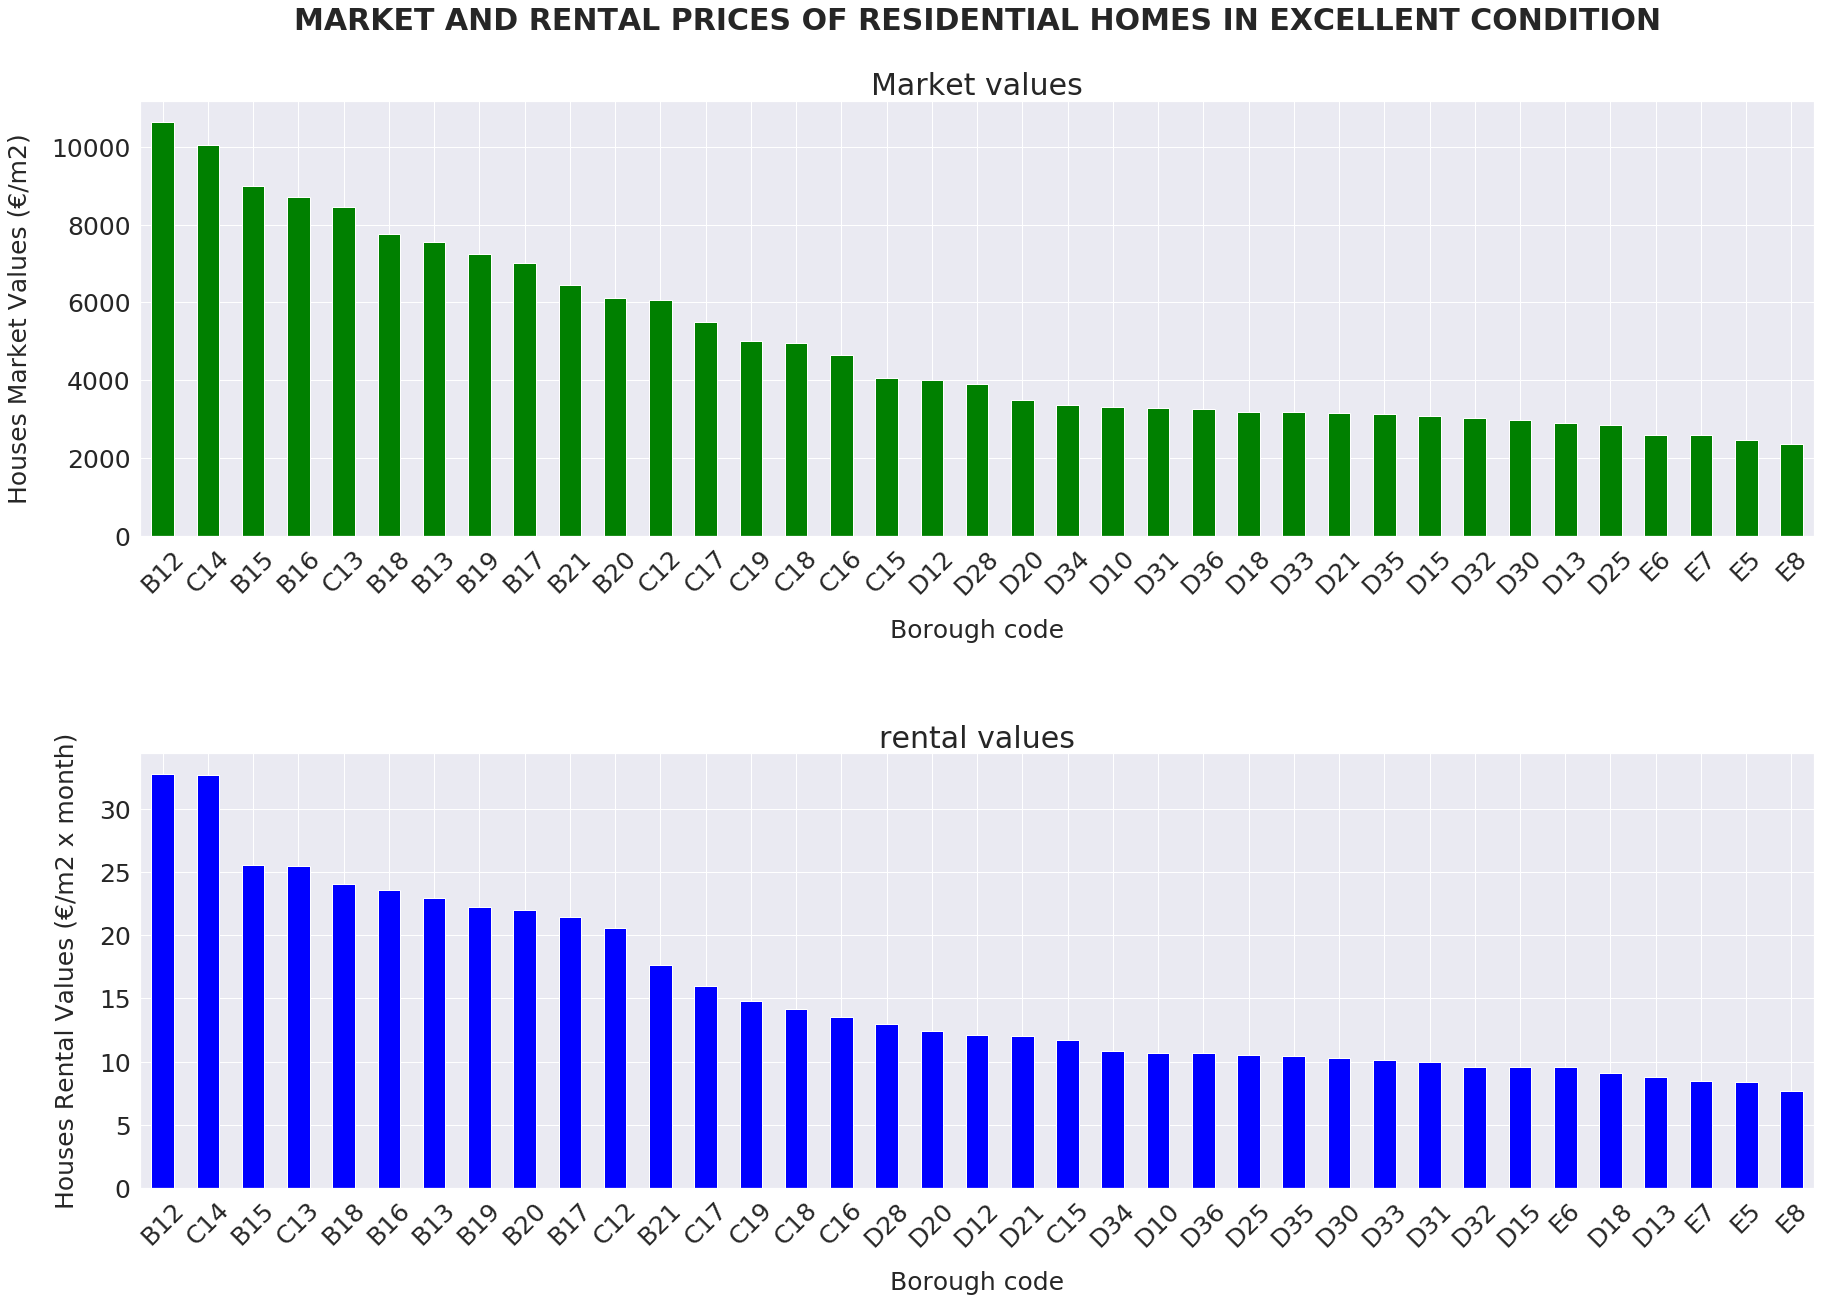

In [171]:
fig = plt.figure() # create figure
ttl = plt.title('MARKET AND RENTAL PRICES OF RESIDENTIAL HOMES IN EXCELLENT CONDITION', weight='bold', size=30)
ttl.set_position([.5, 1.06])
plt.axis('off')
ax0 = fig.add_subplot(2, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 1, 2) # add subplot 2 (1 row, 2 columns, second plot)

market_order = Residential_excellent_df.groupby('Borough code')['Avg_market_value (€/m2)'].sum().reset_index().sort_values('Avg_market_value (€/m2)', ascending=False)
market_order.plot(kind='bar', x='Borough code', y='Avg_market_value (€/m2)', color='green', ax=ax0, figsize=(30, 20), fontsize=25)
ax0.set_title('Market values', fontsize= 30)
ax0.legend(labels='Market prices', loc='upper right', fontsize=20)
ax0.get_legend().remove()
ax0.set_xticklabels(market_order['Borough code'], rotation = 45)

rent_order = Residential_excellent_df.groupby('Borough code')['Avg_rental_value (€/m2 x month)'].sum().reset_index().sort_values('Avg_rental_value (€/m2 x month)', ascending=False)
rent_order.plot(kind='bar', x='Borough code', y='Avg_rental_value (€/m2 x month)', color='blue', ax=ax1, figsize=(30, 20), fontsize=25)
ax1.set_title('rental values', fontsize= 30)
ax1.legend(labels='Rental prices', loc='upper right', fontsize=20)
ax1.get_legend().remove()
ax1.set_xticklabels(rent_order['Borough code'], rotation = 45)

ax0.set_xlabel('Borough code', fontsize=25, labelpad=20)
ax0.set_ylabel('Houses Market Values (€/m2)', fontsize=25, labelpad=20)

ax1.set_xlabel('Borough code', fontsize=25, labelpad=20)
ax1.set_ylabel('Houses Rental Values (€/m2 x month)', fontsize=25, labelpad=20)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

### Create a new dataframe with only the data for residential homes in normal condition

In [172]:
Residential_normal_df = house_data.loc[(house_data['Housing_type'] == 'Residential homes') & (house_data['Condition'] == 'Normal')]
Residential_normal_df.head()

,Boroughs,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Avg_market_value (€/m2),Avg_rental_value (€/m2 x month)
1,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12,Residential homes,Normal,7400,9000,23.0,28.0,8200.0,25.50
4,CENTRO STORICO -UNIVERSITA STATALE,B13,Residential homes,Normal,5000,6900,14.5,18.5,5950.0,16.50
7,CENTRO STORICO - BRERA,B15,Residential homes,Normal,6500,8000,18.6,22.1,7250.0,20.35
10,"CENTRO STORICO -SANT`AMBROGIO, CADORNA, VIA DANTE",B16,Residential homes,Normal,6100,7800,17.5,21.2,6950.0,19.35
13,"PARCO SEMPIONE, ARCO DELLA PACE",B17,Residential homes,Normal,4300,5800,13.2,16.9,5050.0,15.05


### Create the bar charts

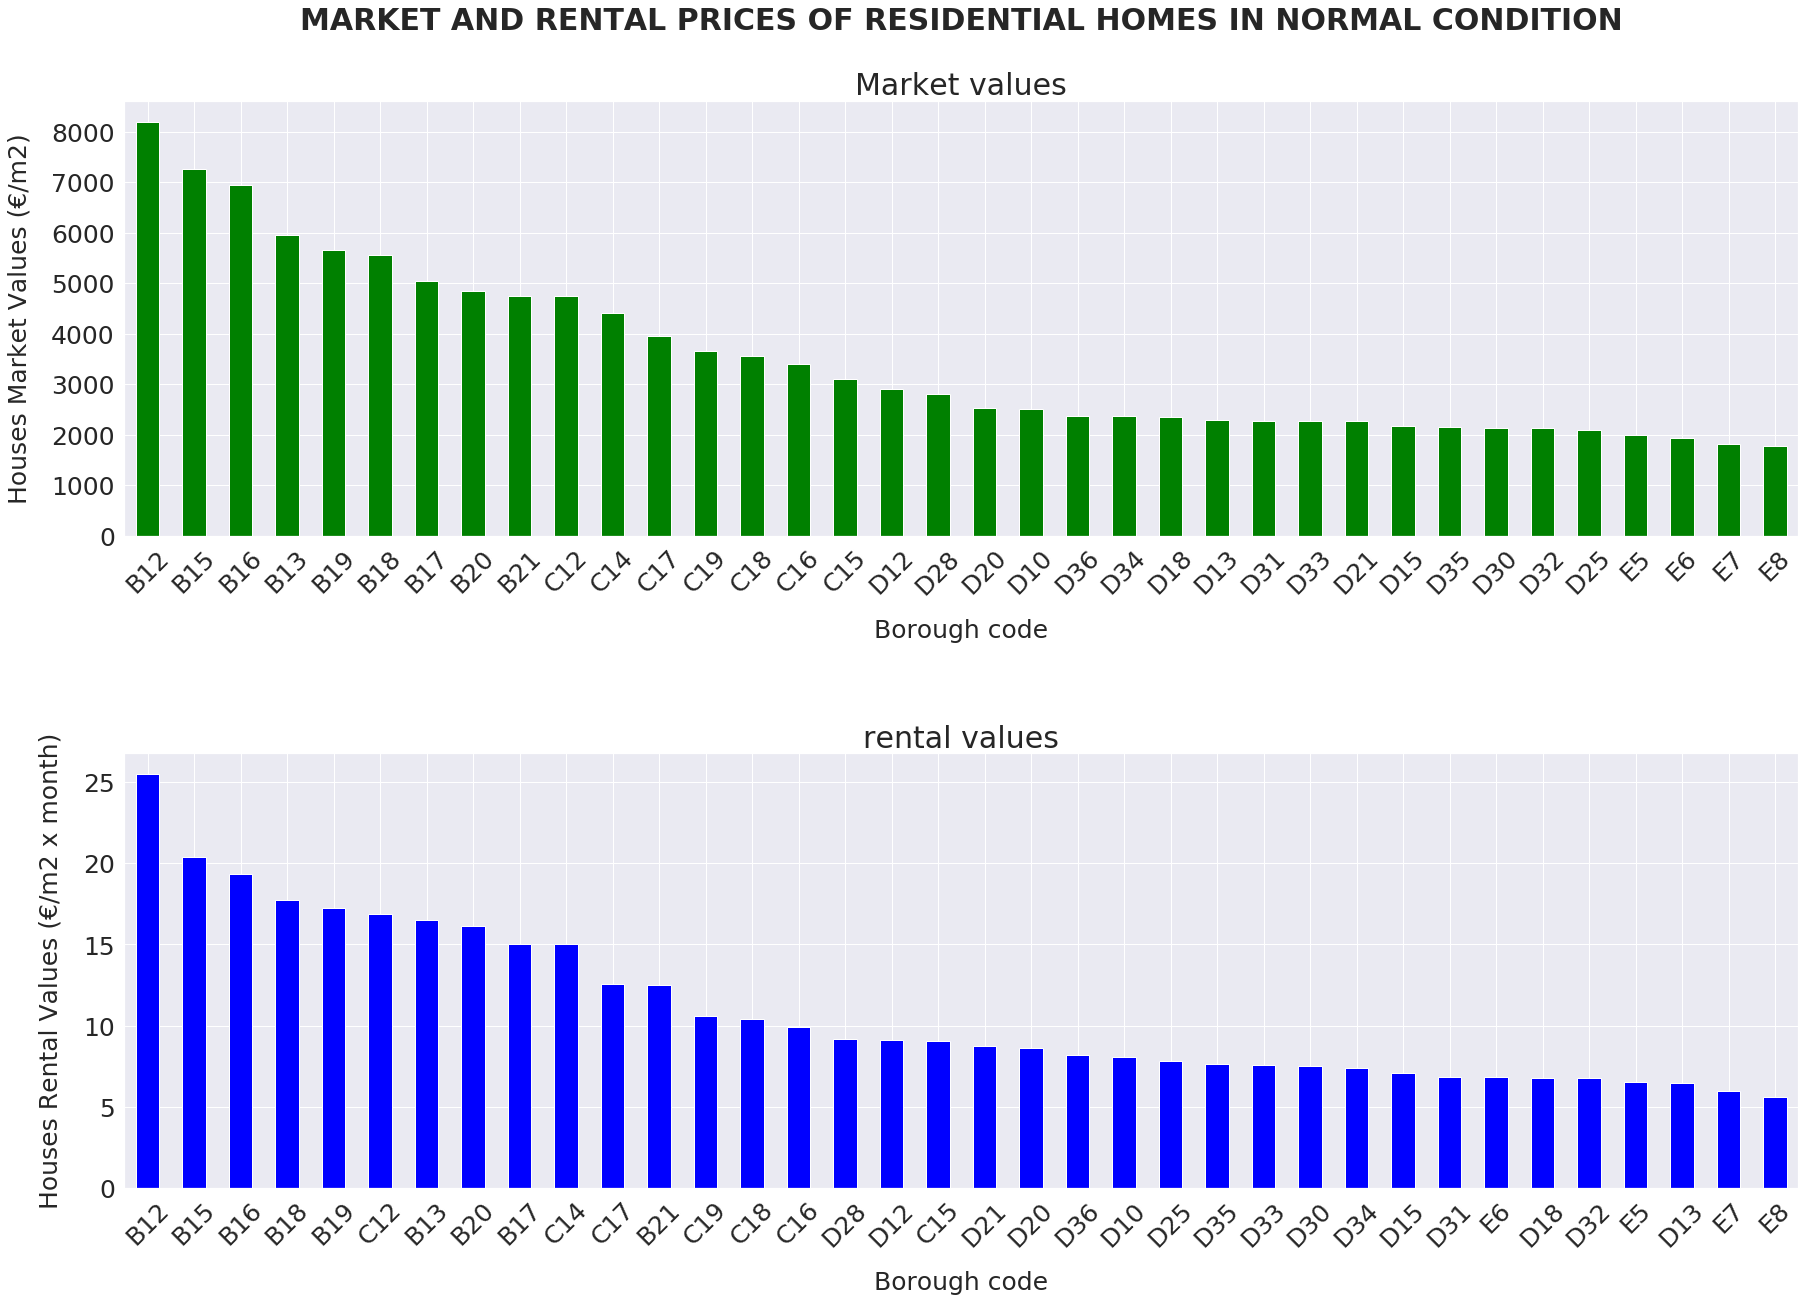

In [173]:
fig = plt.figure() # create figure
ttl = plt.title('MARKET AND RENTAL PRICES OF RESIDENTIAL HOMES IN NORMAL CONDITION', weight='bold', size=30)
ttl.set_position([.5, 1.06])
plt.axis('off')
ax0 = fig.add_subplot(2, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 1, 2) # add subplot 2 (1 row, 2 columns, second plot)

market_order = Residential_normal_df.groupby('Borough code')['Avg_market_value (€/m2)'].sum().reset_index().sort_values('Avg_market_value (€/m2)', ascending=False)
market_order.plot(kind='bar', x='Borough code', y='Avg_market_value (€/m2)', color='green', ax=ax0, figsize=(30, 20), fontsize=25)
ax0.set_title('Market values', fontsize= 30)
ax0.legend(labels='Market prices', loc='upper right', fontsize=20)
ax0.get_legend().remove()
ax0.set_xticklabels(market_order['Borough code'], rotation = 45)

rent_order = Residential_normal_df.groupby('Borough code')['Avg_rental_value (€/m2 x month)'].sum().reset_index().sort_values('Avg_rental_value (€/m2 x month)', ascending=False)
rent_order.plot(kind='bar', x='Borough code', y='Avg_rental_value (€/m2 x month)', color='blue', ax=ax1, figsize=(30, 20), fontsize=25)
ax1.set_title('rental values', fontsize= 30)
ax1.legend(labels='Rental prices', loc='upper right', fontsize=20)
ax1.get_legend().remove()
ax1.set_xticklabels(rent_order['Borough code'], rotation = 45)

ax0.set_xlabel('Borough code', fontsize=25, labelpad=20)
ax0.set_ylabel('Houses Market Values (€/m2)', fontsize=25, labelpad=20)

ax1.set_xlabel('Borough code', fontsize=25, labelpad=20)
ax1.set_ylabel('Houses Rental Values (€/m2 x month)', fontsize=25, labelpad=20)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

### Create a new dataframe with only the data for stately homes

In [174]:
stately_df = house_data.loc[house_data['Housing_type'] == 'Stately homes']
stately_df.head()

,Boroughs,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Avg_market_value (€/m2),Avg_rental_value (€/m2 x month)
2,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12,Stately homes,Excellent,11200,14300,37.5,46.0,12750.0,41.75
5,CENTRO STORICO -UNIVERSITA STATALE,B13,Stately homes,Excellent,7600,9400,22.7,29.0,8500.0,25.85
8,CENTRO STORICO - BRERA,B15,Stately homes,Excellent,10000,12400,29.0,38.6,11200.0,33.80
11,"CENTRO STORICO -SANT`AMBROGIO, CADORNA, VIA DANTE",B16,Stately homes,Excellent,8700,11400,24.7,36.0,10050.0,30.35
14,"PARCO SEMPIONE, ARCO DELLA PACE",B17,Stately homes,Excellent,7800,10700,24.2,28.0,9250.0,26.10


### Create the bar charts

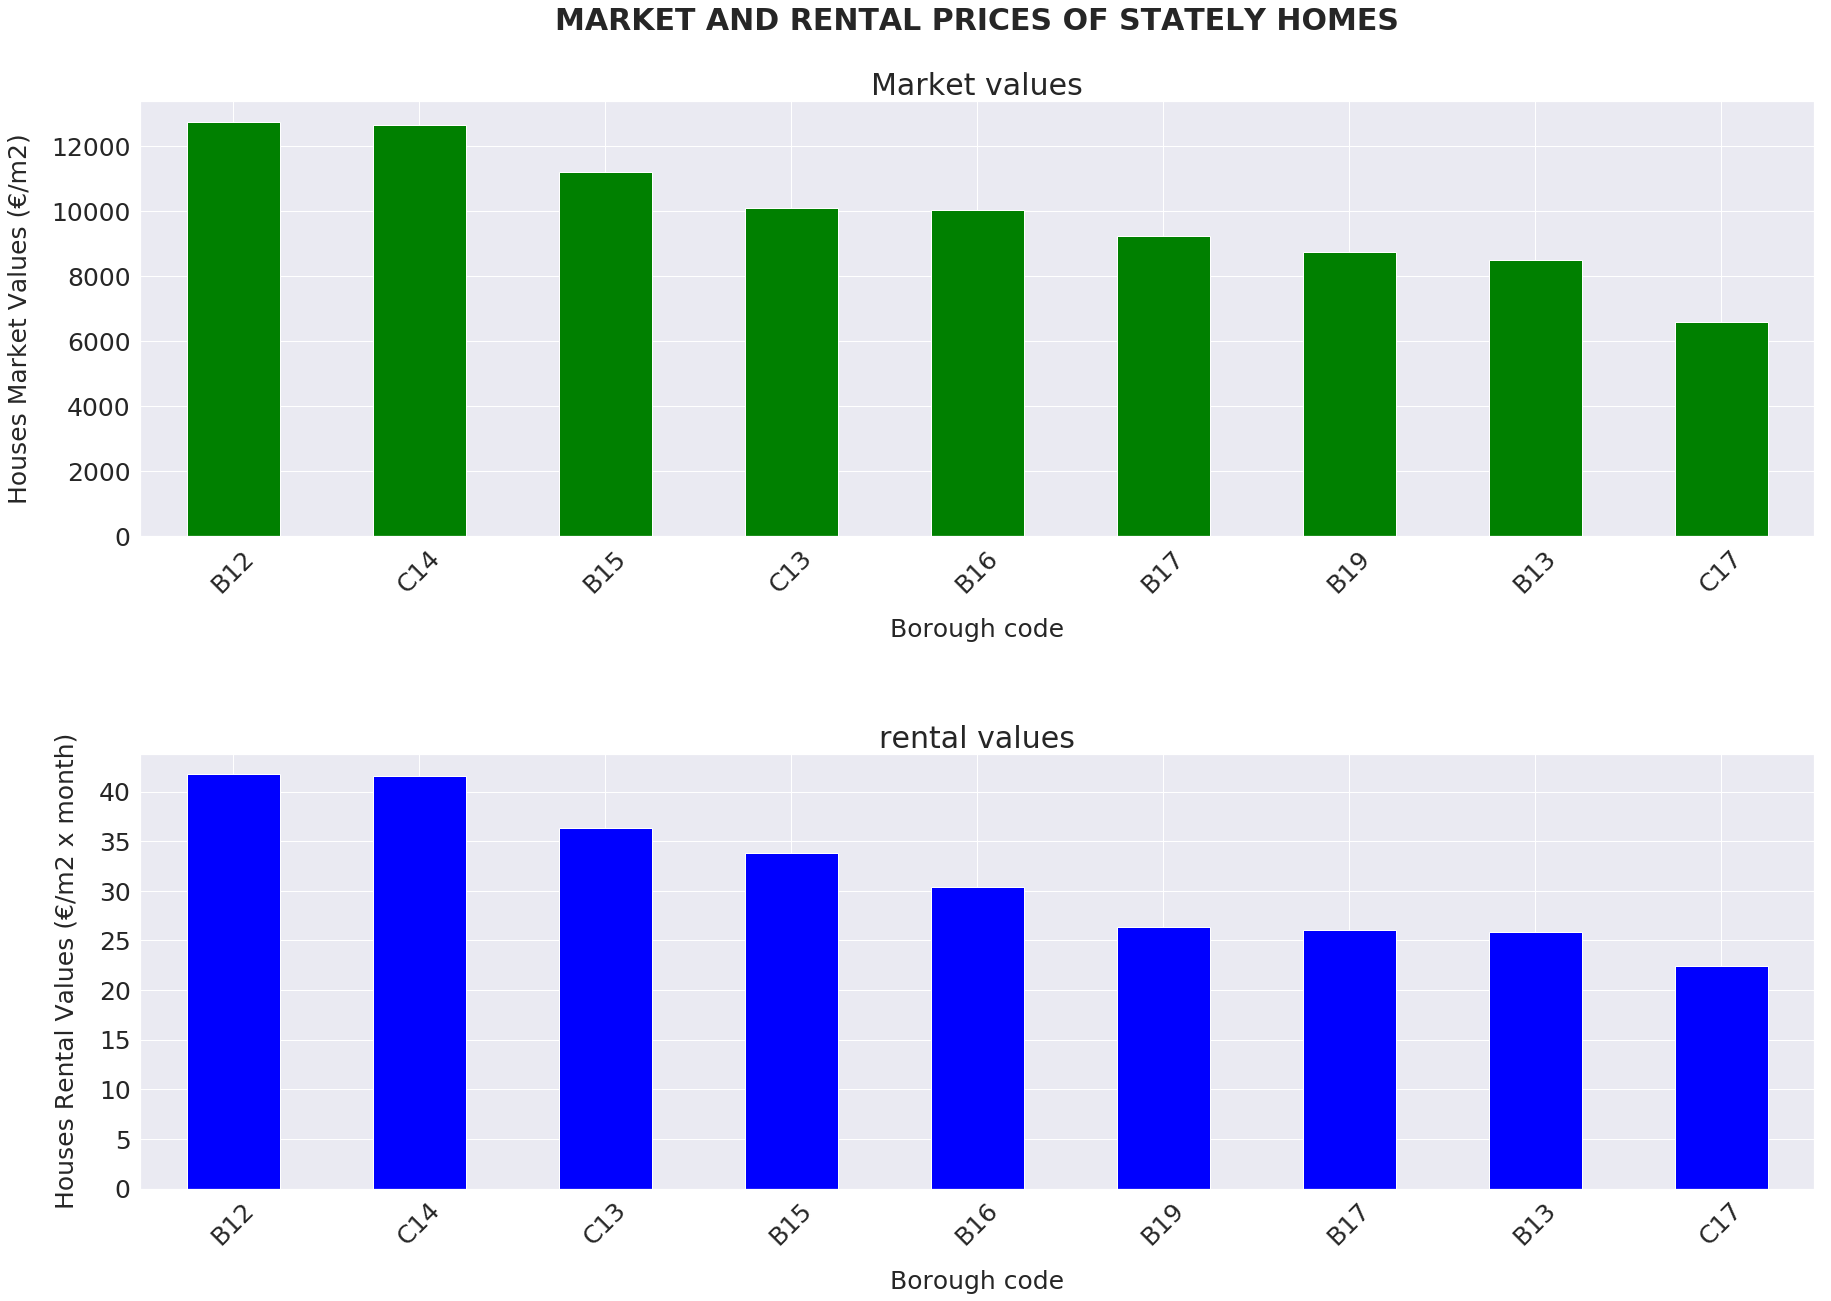

In [175]:
fig = plt.figure() # create figure
ttl = plt.title('MARKET AND RENTAL PRICES OF STATELY HOMES', weight='bold', size=30)
ttl.set_position([.5, 1.06])
plt.axis('off')
ax0 = fig.add_subplot(2, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 1, 2) # add subplot 2 (1 row, 2 columns, second plot)

market_order = stately_df.groupby('Borough code')['Avg_market_value (€/m2)'].sum().reset_index().sort_values('Avg_market_value (€/m2)', ascending=False)
market_order.plot(kind='bar', x='Borough code', y='Avg_market_value (€/m2)', color='green', ax=ax0, figsize=(30, 20), fontsize=25)
ax0.set_title('Market values', fontsize= 30)
ax0.get_legend().remove()
ax0.set_xticklabels(market_order['Borough code'], rotation = 45)

rent_order = stately_df.groupby('Borough code')['Avg_rental_value (€/m2 x month)'].sum().reset_index().sort_values('Avg_rental_value (€/m2 x month)', ascending=False)
rent_order.plot(kind='bar', x='Borough code', y='Avg_rental_value (€/m2 x month)', color='blue', ax=ax1, figsize=(30, 20), fontsize=25)
ax1.set_title('rental values', fontsize= 30)
ax1.get_legend().remove()
ax1.set_xticklabels(rent_order['Borough code'], rotation = 45)

ax0.set_xlabel('Borough code', fontsize=25, labelpad=20)
ax0.set_ylabel('Houses Market Values (€/m2)', fontsize=25, labelpad=20)

ax1.set_xlabel('Borough code', fontsize=25, labelpad=20)
ax1.set_ylabel('Houses Rental Values (€/m2 x month)', fontsize=25, labelpad=20)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

## 3.4 Determination of the correlation between the distance of the house from the city center and average home value <a name='correlation'></a>

Bar plots have shown that the boroughs closer to the city center are more expensive; on the contrary, the ones farthest to the city center are the most affordable. <br/>
To deepen into this discovery, it has been decided to extend the boundaries taken into account, examining the house prices for all the Milan areas (B, C, D and E). <br/>
Multiple box plots have been created, for the average market and rental values of each housing type and the related condition, considering also the Milan areas. <br/>
Therefore, regression have been generated, to estimate the relationships between a dependent variable (house prices) and the independent variables (distance to the city center).

### 3.3.1 Box plots: average market/rental values of housing types and the related conditions, considering the Milan areas <a name='box_plot'></a>

A boxplot is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles. Any data not included between the whiskers should be plotted as an outlier. <br/>
In order to create the box plots, the 4 Milan areas have been taken in account and, as bar charts already generated, multiple plots have been created for each housing type and the related condition:
- market values of residential homes in excellent condition; 
- rental values of residential homes in excellent condition; 
- market values of residential homes in normal condition; 
- rental values of residential homes in normal condition
- market values of stately homes; 
- rental values of stately homes.

### Calculate the average value of residential homes in excellent condition

In [176]:
Residential_excellent_df['Area'] = Residential_excellent_df['Borough code'].str[:1]
Residential_excellent_df.head()

,Boroughs,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Avg_market_value (€/m2),Avg_rental_value (€/m2 x month),Area
0,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12,Residential homes,Excellent,9000,12300,28.0,37.5,10650.0,32.75,B
3,CENTRO STORICO -UNIVERSITA STATALE,B13,Residential homes,Excellent,6900,8200,18.5,27.3,7550.0,22.90,B
6,CENTRO STORICO - BRERA,B15,Residential homes,Excellent,8000,10000,22.1,29.0,9000.0,25.55,B
9,"CENTRO STORICO -SANT`AMBROGIO, CADORNA, VIA DANTE",B16,Residential homes,Excellent,7800,9600,21.3,25.9,8700.0,23.60,B
12,"PARCO SEMPIONE, ARCO DELLA PACE",B17,Residential homes,Excellent,5800,8200,16.9,26.0,7000.0,21.45,B


### Create the box plot

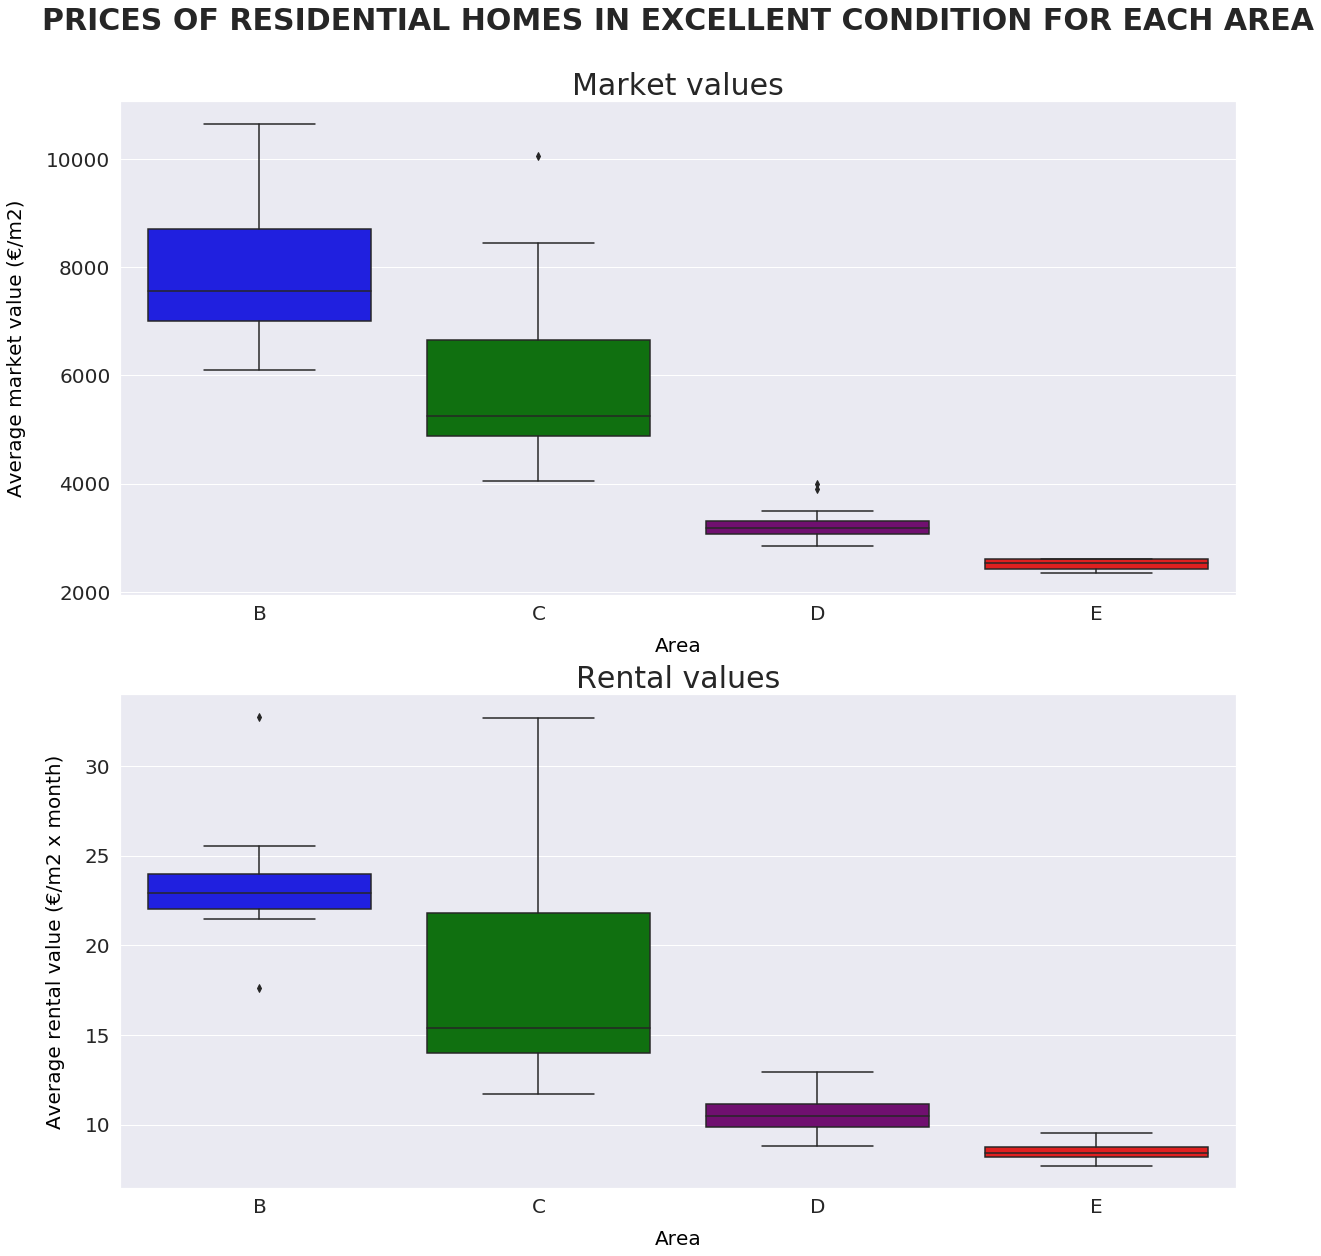

<Figure size 2520x1440 with 0 Axes>

In [177]:
fig = plt.figure(figsize=(20,20)) # create figure
ttl = plt.title('PRICES OF RESIDENTIAL HOMES IN EXCELLENT CONDITION FOR EACH AREA', weight='bold', size=30)
ttl.set_position([.5, 1.06])
plt.axis('off')
plt.figure(figsize=(35,20))
ax0 = fig.add_subplot(2, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 1, 2) # add subplot 2 (1 row, 2 columns, second plot)
plt.subplots_adjust(wspace=20, hspace=10)

my_pal = {"B": "blue", "C": "green", "D":"purple", "E" : "red"}

plot0 = sns.boxplot(x='Area', y='Avg_market_value (€/m2)', ax=ax0, data=Residential_excellent_df, palette=my_pal)
plot1 = sns.boxplot(x='Area', y='Avg_rental_value (€/m2 x month)', ax=ax1, data=Residential_excellent_df, palette=my_pal)

ax0.set_title('Market values', fontsize= 30)
ax1.set_title('Rental values', fontsize= 30)

ax0.set_xlabel('Area', color='black', fontsize=20, labelpad=13)
ax0.set_ylabel('Average market value (€/m2)', color='black', fontsize=20, labelpad=20)
ax0.tick_params(labelsize=20)

ax1.set_xlabel('Area', color='black', fontsize=20, labelpad=13)
ax1.set_ylabel('Average rental value (€/m2 x month)', color='black', fontsize=20, labelpad=20)
ax1.tick_params(labelsize=20)

### Calculate the average value of residential homes in normal condition

In [178]:
Residential_normal_df['Area'] = Residential_normal_df['Borough code'].str[:1]
Residential_normal_df.head()

,Boroughs,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Avg_market_value (€/m2),Avg_rental_value (€/m2 x month),Area
1,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12,Residential homes,Normal,7400,9000,23.0,28.0,8200.0,25.50,B
4,CENTRO STORICO -UNIVERSITA STATALE,B13,Residential homes,Normal,5000,6900,14.5,18.5,5950.0,16.50,B
7,CENTRO STORICO - BRERA,B15,Residential homes,Normal,6500,8000,18.6,22.1,7250.0,20.35,B
10,"CENTRO STORICO -SANT`AMBROGIO, CADORNA, VIA DANTE",B16,Residential homes,Normal,6100,7800,17.5,21.2,6950.0,19.35,B
13,"PARCO SEMPIONE, ARCO DELLA PACE",B17,Residential homes,Normal,4300,5800,13.2,16.9,5050.0,15.05,B


### Create the box plot

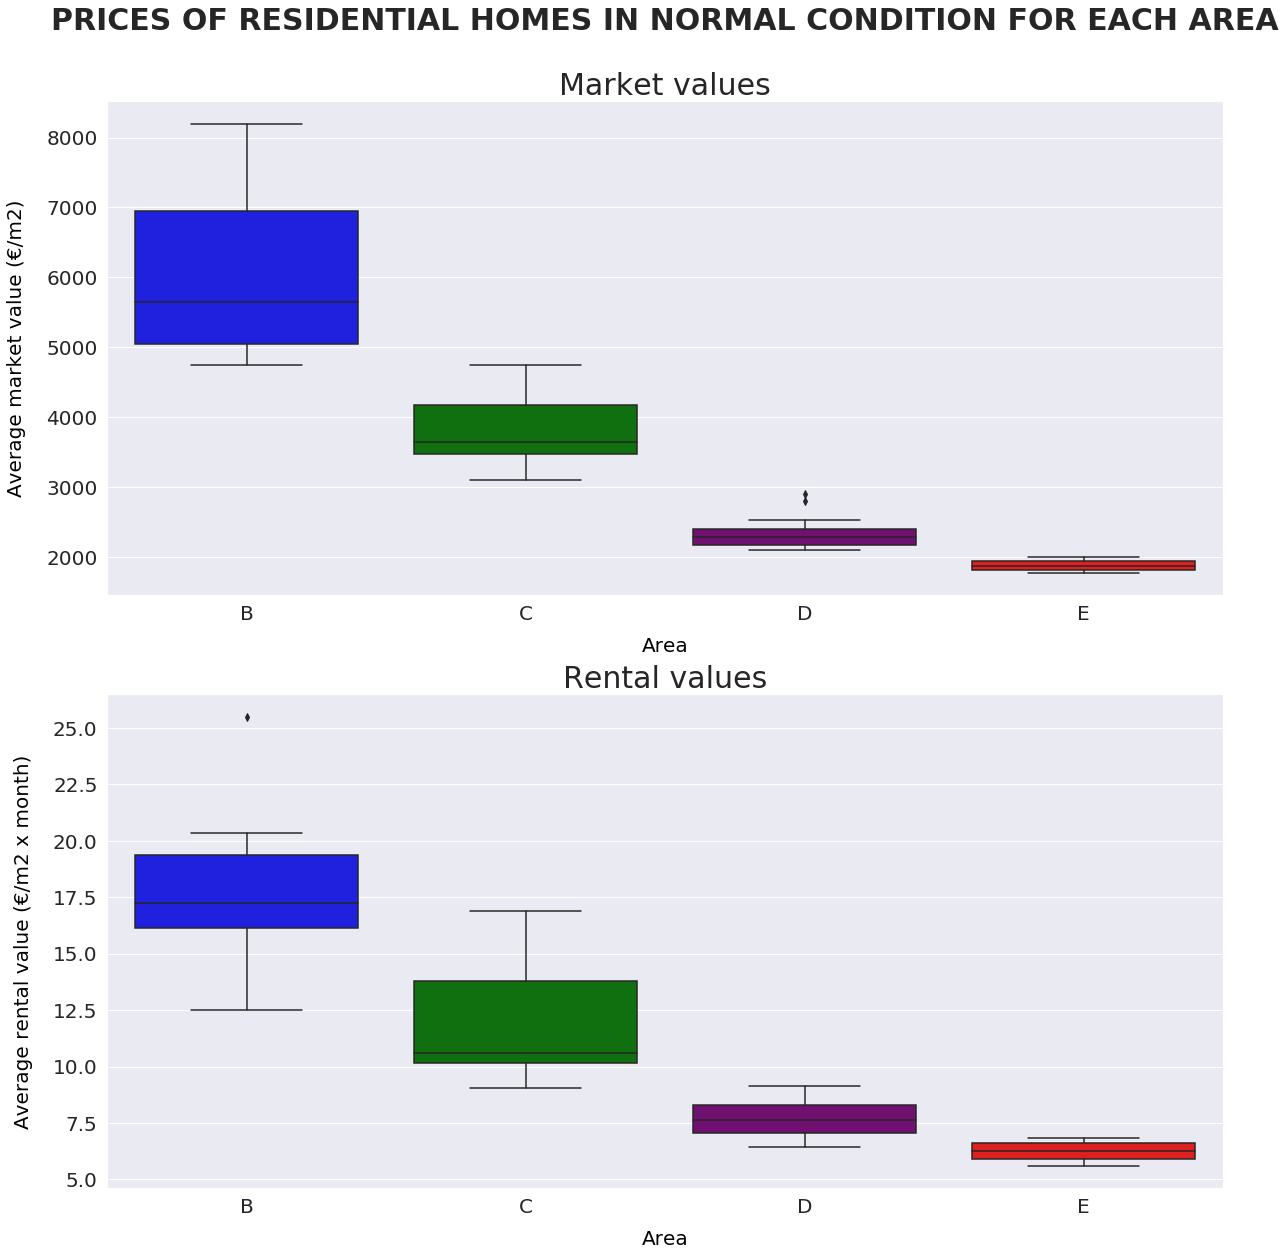

<Figure size 2520x1440 with 0 Axes>

In [179]:
fig = plt.figure(figsize=(20,20)) # create figure
ttl = plt.title('PRICES OF RESIDENTIAL HOMES IN NORMAL CONDITION FOR EACH AREA', weight='bold', size=30)
ttl.set_position([.5, 1.06])
plt.axis('off')
plt.figure(figsize=(35,20))
ax0 = fig.add_subplot(2, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 1, 2) # add subplot 2 (1 row, 2 columns, second plot)
plt.subplots_adjust(wspace=20, hspace=10)

my_pal = {"B": "blue", "C": "green", "D":"purple", "E" : "red"}

sns.boxplot(x='Area', y='Avg_market_value (€/m2)', ax=ax0, data=Residential_normal_df, palette=my_pal)
sns.boxplot(x='Area', y='Avg_rental_value (€/m2 x month)', ax=ax1, data=Residential_normal_df, palette=my_pal)

ax0.set_title('Market values', fontsize= 30)
ax1.set_title('Rental values', fontsize= 30)

ax0.set_xlabel('Area', color='black', fontsize=20, labelpad=13)
ax0.set_ylabel('Average market value (€/m2)', color='black', fontsize=20, labelpad=20)
ax0.tick_params(labelsize=20)

ax1.set_xlabel('Area', color='black', fontsize=20, labelpad=13)
ax1.set_ylabel('Average rental value (€/m2 x month)', color='black', fontsize=20, labelpad=20)
ax1.tick_params(labelsize=20)

### Calculate the average value of stately homes

In [180]:
stately_df['Area'] = stately_df['Borough code'].str[:1]
stately_df.head()

,Boroughs,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Avg_market_value (€/m2),Avg_rental_value (€/m2 x month),Area
2,"CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLEO...",B12,Stately homes,Excellent,11200,14300,37.5,46.0,12750.0,41.75,B
5,CENTRO STORICO -UNIVERSITA STATALE,B13,Stately homes,Excellent,7600,9400,22.7,29.0,8500.0,25.85,B
8,CENTRO STORICO - BRERA,B15,Stately homes,Excellent,10000,12400,29.0,38.6,11200.0,33.80,B
11,"CENTRO STORICO -SANT`AMBROGIO, CADORNA, VIA DANTE",B16,Stately homes,Excellent,8700,11400,24.7,36.0,10050.0,30.35,B
14,"PARCO SEMPIONE, ARCO DELLA PACE",B17,Stately homes,Excellent,7800,10700,24.2,28.0,9250.0,26.10,B


### Create the box plot

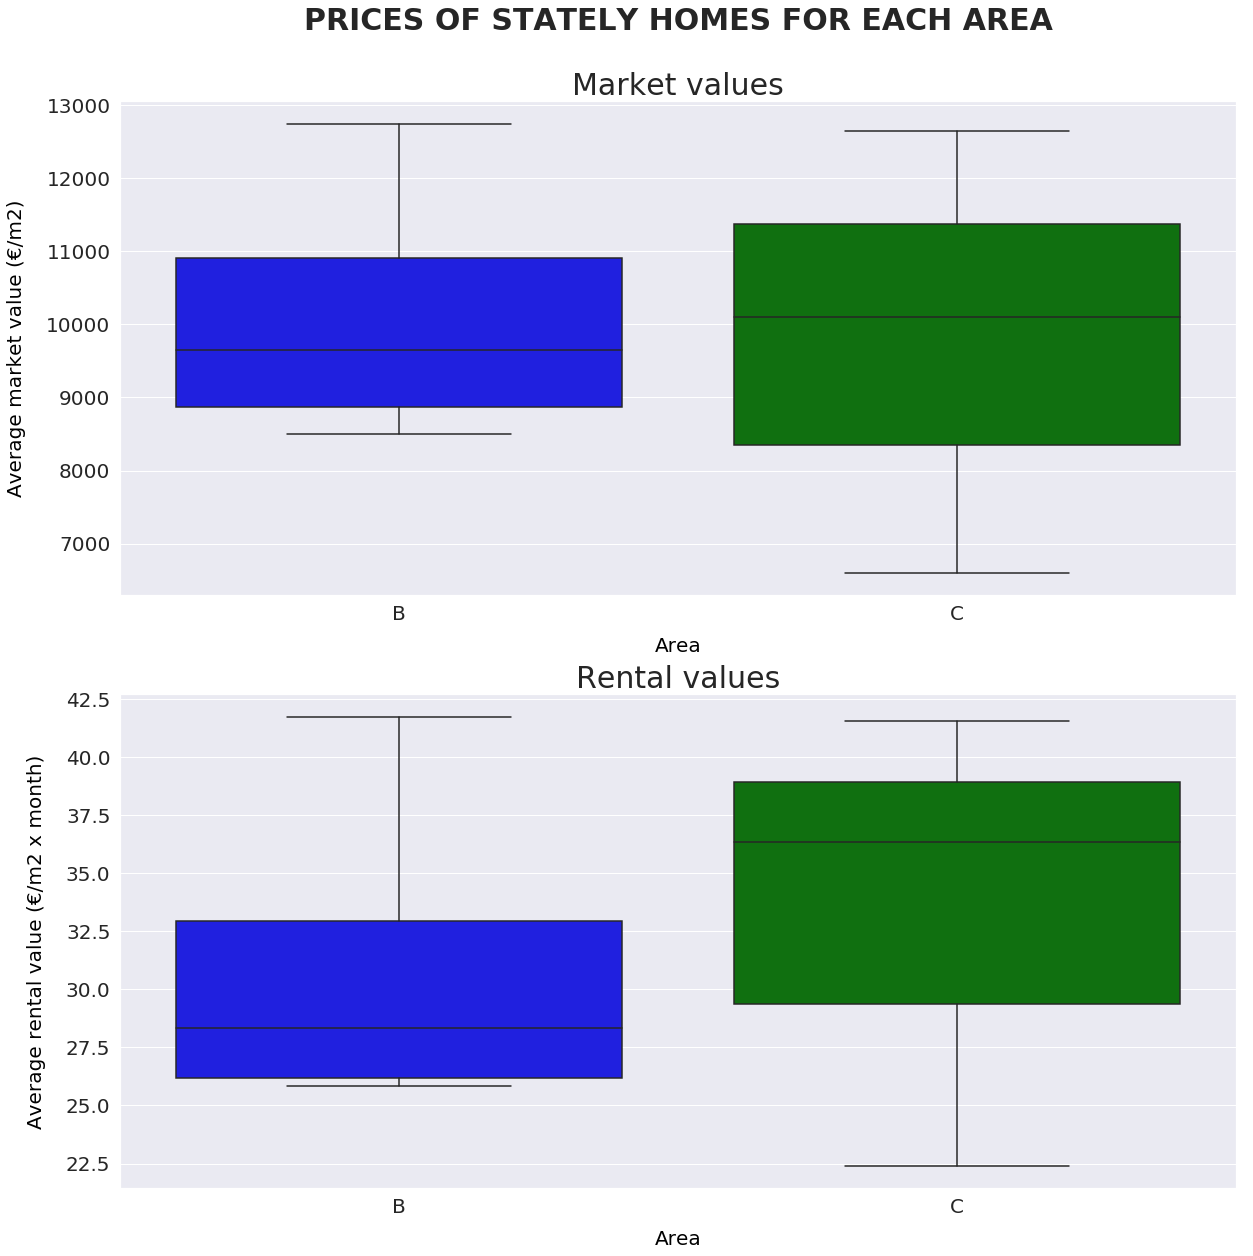

<Figure size 2520x1440 with 0 Axes>

In [181]:
fig = plt.figure(figsize=(20,20)) # create figure
ttl = plt.title('PRICES OF STATELY HOMES FOR EACH AREA', weight='bold', size=30)
ttl.set_position([.5, 1.06])
plt.axis('off')
plt.figure(figsize=(35,20))
ax0 = fig.add_subplot(2, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 1, 2) # add subplot 2 (1 row, 2 columns, second plot)
plt.subplots_adjust(wspace=20, hspace=10)

my_pal = {"B": "blue", "C": "green"}

sns.boxplot(x='Area', y='Avg_market_value (€/m2)', ax=ax0, data=stately_df, palette=my_pal)
sns.boxplot(x='Area', y='Avg_rental_value (€/m2 x month)', ax=ax1, data=stately_df, palette=my_pal)

ax0.set_title('Market values', fontsize= 30)
ax1.set_title('Rental values', fontsize= 30)

ax0.set_xlabel('Area', color='black', fontsize=20, labelpad=13)
ax0.set_ylabel('Average market value (€/m2)', color='black', fontsize=20, labelpad=20)
ax0.tick_params(labelsize=20)

ax1.set_xlabel('Area', color='black', fontsize=20, labelpad=13)
ax1.set_ylabel('Average rental value (€/m2 x month)', color='black', fontsize=20, labelpad=20)
ax1.tick_params(labelsize=20)

## 3.4.2 Regression <a name='regression'></a>

Box plots have showed that it can be a correlation between the residential house prices and the distance from the city center, indeed it clearly visible that the most expensive residential homes are located in the B and C areas, and the most affordable ones are located in D and E areas. <br/>
The precedent analysis highlight something different for stately house, indeed the prices of houses in B and C areas are in line with each other. <br/>
To clearly see if what supposed above is true, regression analysis has been done. In fact, as mentioned above, regression is the main tool to estimate the relationships between a dependent variable, in this case the house values, and the independent variables, the distance to the city center.

### Retrieve Milan center coordinates

First of all, distance of each neighborhoods has been calculated: retrieving Milan city center coordinates (Duomo square, where Duomo Cathedral is located) using Geocode library at first, and then calculating the distances.


In [182]:
Duomo_address='Duomo di Milano, Italy'
geolocater= Nominatim(user_agent="Center_search")
center= geolocater.geocode(Duomo_address)
lat_Duomo= center.latitude
lon_Duomo= center.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(Duomo_address,lat_Duomo, lon_Duomo))

The geograpical coordinate of Duomo di Milano, Italy are 45.46416835, 9.191621109614111.


### Calculate the distance of each neighborhood from the city center

For convenience we will use house_info dataframe and we will calculate the average market and rental prices for each neighborhood.

In [183]:
house_info['Avg_market_value (€/m2)'] = house_info[['Min_market_value (€/m2)', 'Max_market_value (€/m2)']].mean(axis=1)
house_info['Avg_rental_value (€/m2 x month)'] = house_info[['Min_rental_value (€/m2 x month)', 'Max_rental_value (€/m2 x month)']].mean(axis=1)
house_info.head()

,Neighborhoods,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Latitude,Longitude,Area,Avg_market_value (€/m2),Avg_rental_value (€/m2 x month)
0,DUOMO,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.464138,9.188555,B,10650.0,32.75
1,DUOMO,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.464138,9.188555,B,8200.0,25.50
2,DUOMO,B12,Stately homes,Excellent,11200,14300,37.5,46.0,45.464138,9.188555,B,12750.0,41.75
3,SAN BABILA,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.466521,9.197529,B,10650.0,32.75
4,SAN BABILA,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.466521,9.197529,B,8200.0,25.50


In [184]:
def haversine_vectorize(lon1, lat1, lon2, lat2): 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula))
    km = 6367 * dist #6367 for distance in km, for miles use 3958
    return km

distance_center = haversine_vectorize(lat_Duomo, lon_Duomo, house_info['Latitude'], house_info['Longitude'])
house_info = pd.concat([house_info, distance_center.rename('Distance_from_center (km)')], axis=1)
house_info.head()

,Neighborhoods,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Latitude,Longitude,Area,Avg_market_value (€/m2),Avg_rental_value (€/m2 x month),Distance_from_center (km)
0,DUOMO,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.464138,9.188555,B,10650.0,32.75,0.340760
1,DUOMO,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.464138,9.188555,B,8200.0,25.50,0.340760
2,DUOMO,B12,Stately homes,Excellent,11200,14300,37.5,46.0,45.464138,9.188555,B,12750.0,41.75,0.340760
3,SAN BABILA,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.466521,9.197529,B,10650.0,32.75,0.705394
4,SAN BABILA,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.466521,9.197529,B,8200.0,25.50,0.705394


### Create a new dataframe with only the data for residential homes in excellent condition

In [185]:
residential_excellent_average = house_info.loc[(house_info['Housing_type'] == 'Residential homes') & (house_info['Condition'] == 'Excellent')]
residential_excellent_average

,Neighborhoods,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Latitude,Longitude,Area,Avg_market_value (€/m2),Avg_rental_value (€/m2 x month),Distance_from_center (km)
0,DUOMO,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.464138,9.188555,B,10650.0,32.75,0.340760
3,SAN BABILA,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.466521,9.197529,B,10650.0,32.75,0.705394
6,MONTENAPOLEONE,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.470015,9.192868,B,10650.0,32.75,0.656158
9,MISSORI,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.459828,9.189555,B,10650.0,32.75,0.528621
12,CAIROLI,B12,Residential homes,Excellent,9000,12300,28.0,37.5,45.468701,9.181697,B,10650.0,32.75,1.209779
15,CITTÀ STUDI,B13,Residential homes,Excellent,6900,8200,18.5,27.3,45.477056,9.226575,B,7550.0,22.90,4.133461
18,BRERA,B15,Residential homes,Excellent,8000,10000,22.1,29.0,45.471519,9.187735,B,9000.0,25.55,0.914680
21,SANT`AMBROGIO,B16,Residential homes,Excellent,7800,9600,21.3,25.9,45.461391,9.172917,B,8700.0,23.60,2.100748
24,CADORNA,B16,Residential homes,Excellent,7800,9600,21.3,25.9,45.468195,9.176426,B,8700.0,23.60,1.745356
27,VIA DANTE,B16,Residential homes,Excellent,7800,9600,21.3,25.9,45.465740,9.185461,B,8700.0,23.60,0.705964


### Create the scatter plots

Subsequently, for each housing type and the related condition, two type of scatter plots have been created: 
- in the first ones, the distance of all the Milan neighborhoods and the house prices are compared. Each neighborhood point has different colors, based on the belonging Milan area (the same colors of the above map of Milan neighborhoods have been chosen).
- In second ones, the curve has been fitted by applying curve_fit, which uses nonlinear least squares to fit the data. In these cases, the functions are all logarithmic, as it is possible to see form the scatter plots previously created.  

Text(68.26272166360295, 0.5, 'Price (€/m2)')

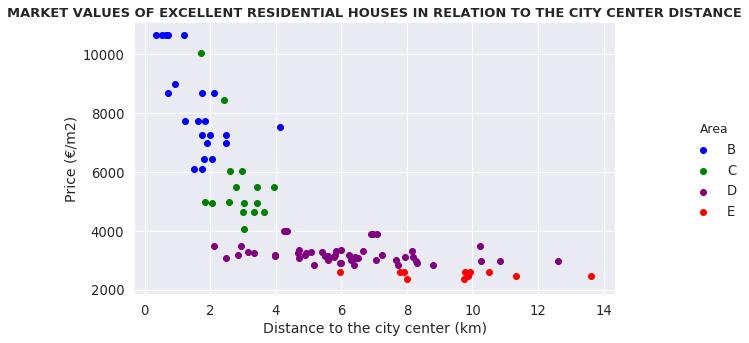

In [186]:
d = {'color': ['blue', 'green', 'purple', 'red']}

sns.set(font_scale = 1.2)
fg = sns.FacetGrid(data=residential_excellent_average, hue='Area', hue_kws=d, height=5.0, aspect=1.7)
ttl = plt.title("MARKET VALUES OF EXCELLENT RESIDENTIAL HOUSES IN RELATION TO THE CITY CENTER DISTANCE", weight='bold', size=13)

fg.map(plt.scatter, 'Distance_from_center (km)', 'Avg_market_value (€/m2)').add_legend()
plt.xlabel('Distance to the city center (km)', fontsize=14)
plt.ylabel('Price (€/m2)', fontsize=14) 

Text(0, 0.5, 'Price (€/m2)')

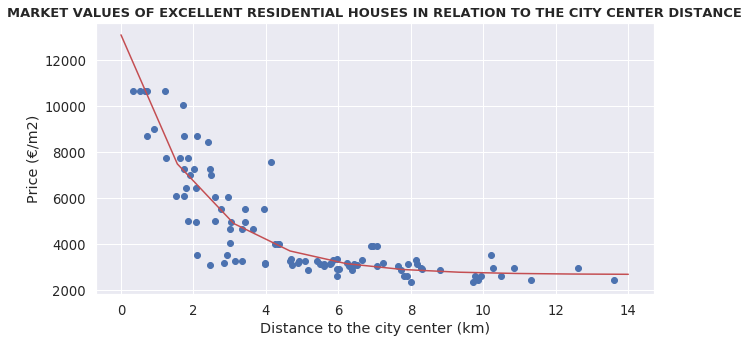

In [187]:
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

x_er = residential_excellent_average['Distance_from_center (km)']
y_er = residential_excellent_average['Avg_market_value (€/m2)']

p0 = (1.,1.e-10,1.) # starting search koefs
opt, pcov = curve_fit(model_func, x_er, y_er, p0)
a, k, b = opt

x2 = np.linspace(0, 14, 10)
y2 = model_func(x2, a, k, b)
fig, ax = plt.subplots(figsize=(10,5))

plt.rcParams.update({'font.size': 20})
ax.plot(x_er, y_er, 'bo', label='data with noise')
ax.plot(x2, y2, color='r', label='Fit. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b))

plt.title("MARKET VALUES OF EXCELLENT RESIDENTIAL HOUSES IN RELATION TO THE CITY CENTER DISTANCE", weight='bold', size=13)
plt.xlabel('Distance to the city center (km)')
plt.ylabel('Price (€/m2)')

Text(91.2025648391544, 0.5, 'Price (€/m2 x month)')

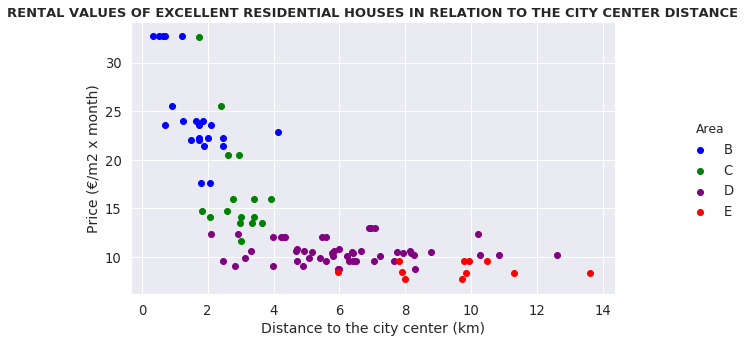

In [188]:
d = {'color': ['blue', 'green', 'purple', 'red']}

sns.set(font_scale = 1.2)
fg = sns.FacetGrid(data=residential_excellent_average, hue='Area', hue_kws=d, height=5.0, aspect=1.7) 
plt.title("RENTAL VALUES OF EXCELLENT RESIDENTIAL HOUSES IN RELATION TO THE CITY CENTER DISTANCE", weight='bold', size=13)

fg.map(plt.scatter, 'Distance_from_center (km)', 'Avg_rental_value (€/m2 x month)').add_legend()
plt.xlabel('Distance to the city center (km)', fontsize=14)
plt.ylabel('Price (€/m2 x month)', fontsize=14)

Text(0, 0.5, 'Price (€/m2 x month)')

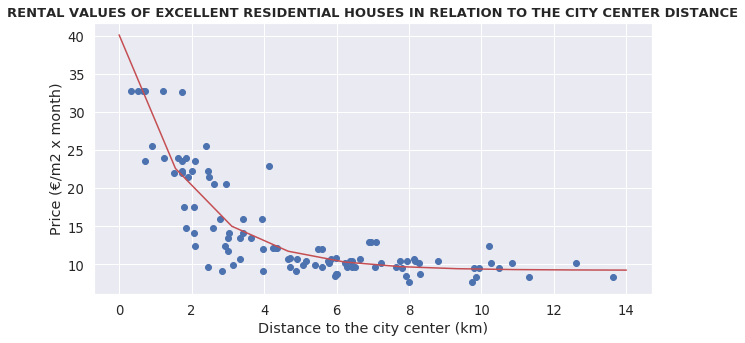

In [189]:
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

x_re1 = residential_excellent_average['Distance_from_center (km)']
y_re1 = residential_excellent_average['Avg_rental_value (€/m2 x month)']

p0 = (1.,1.e-5,1.) # starting search koefs
opt, pcov = curve_fit(model_func, x_re1, y_re1, p0)
a, k, b = opt

x2 = np.linspace(0, 14, 10)
y2 = model_func(x2, a, k, b)
fig, ax = plt.subplots(figsize=(10,5))

plt.rcParams.update({'font.size': 20})
ax.plot(x_re1, y_re1, 'bo', label='data with noise')
ax.plot(x2, y2, color='r', label='Fit. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b))

plt.title("RENTAL VALUES OF EXCELLENT RESIDENTIAL HOUSES IN RELATION TO THE CITY CENTER DISTANCE", weight='bold', size=13)
plt.xlabel('Distance to the city center (km)')
plt.ylabel('Price (€/m2 x month)')

### Create a new dataframe with only the data for residential homes in normal condition

In [190]:
residential_normal_average = house_info.loc[(house_info['Housing_type'] == 'Residential homes') & (house_info['Condition'] == 'Normal')]
residential_normal_average.head()

,Neighborhoods,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Latitude,Longitude,Area,Avg_market_value (€/m2),Avg_rental_value (€/m2 x month),Distance_from_center (km)
1,DUOMO,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.464138,9.188555,B,8200.0,25.5,0.340760
4,SAN BABILA,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.466521,9.197529,B,8200.0,25.5,0.705394
7,MONTENAPOLEONE,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.470015,9.192868,B,8200.0,25.5,0.656158
10,MISSORI,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.459828,9.189555,B,8200.0,25.5,0.528621
13,CAIROLI,B12,Residential homes,Normal,7400,9000,23.0,28.0,45.468701,9.181697,B,8200.0,25.5,1.209779


### Create the scatter plots

Text(65.7759707444853, 0.5, 'Price (€/m2)')

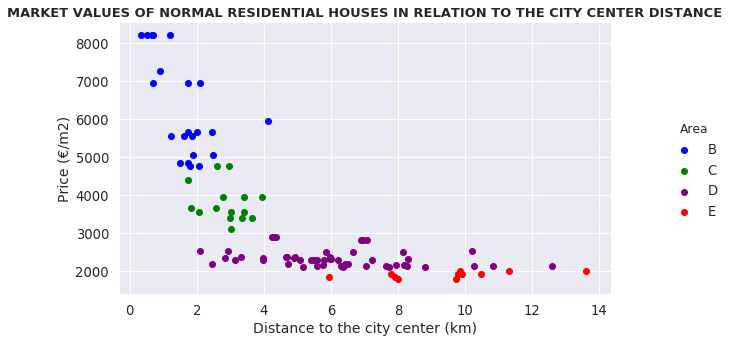

In [191]:
d = {'color': ['blue', 'green', 'purple', 'red']}

sns.set(font_scale = 1.2)
fg = sns.FacetGrid(data=residential_normal_average, hue='Area', hue_kws=d, height=5.0, aspect=1.7) 
plt.title("MARKET VALUES OF NORMAL RESIDENTIAL HOUSES IN RELATION TO THE CITY CENTER DISTANCE", weight='bold', size=13)
fg.map(plt.scatter, 'Distance_from_center (km)', 'Avg_market_value (€/m2)').add_legend()
plt.xlabel('Distance to the city center (km)', fontsize=14)
plt.ylabel('Price (€/m2)', fontsize=14)

Text(0, 0.5, 'Price (€/m2)')

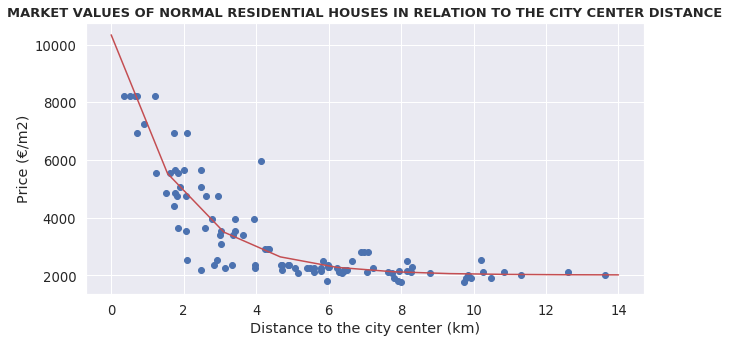

In [192]:
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

x_rn = residential_normal_average['Distance_from_center (km)']
y_rn = residential_normal_average['Avg_market_value (€/m2)']

p0 = (1.,1.e-10,1.) # starting search koefs
opt, pcov = curve_fit(model_func, x_rn, y_rn, p0)
a, k, b = opt

x2 = np.linspace(0, 14, 10)
y2 = model_func(x2, a, k, b)
fig, ax = plt.subplots(figsize=(10,5))

plt.rcParams.update({'font.size': 20})
ax.plot(x_rn, y_rn, 'bo', label='data with noise')
ax.plot(x2, y2, color='r', label='Fit. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b))

plt.title("MARKET VALUES OF NORMAL RESIDENTIAL HOUSES IN RELATION TO THE CITY CENTER DISTANCE", weight='bold', size=13)
plt.xlabel('Distance to the city center (km)')
plt.ylabel('Price (€/m2)')

Text(67.96581392003675, 0.5, 'Price (€/m2 x month)')

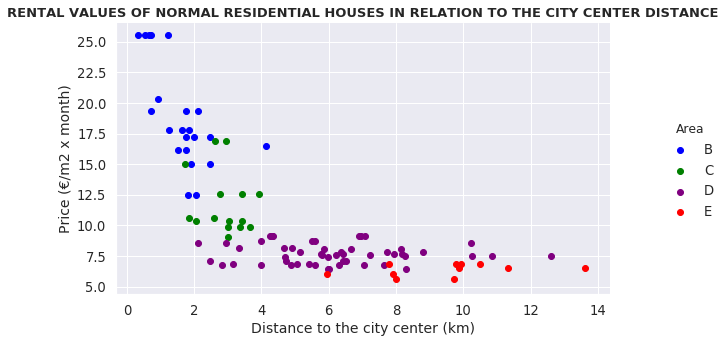

In [193]:
d = {'color': ['blue', 'green', 'purple', 'red']}

sns.set(font_scale = 1.2)
fg = sns.FacetGrid(data=residential_normal_average, hue='Area', hue_kws=d, height=5.0, aspect=1.7) 
plt.title("RENTAL VALUES OF NORMAL RESIDENTIAL HOUSES IN RELATION TO THE CITY CENTER DISTANCE", weight='bold', size=13)
fg.map(plt.scatter, 'Distance_from_center (km)', 'Avg_rental_value (€/m2 x month)').add_legend()
plt.xlabel('Distance to the city center (km)', fontsize=14)
plt.ylabel('Price (€/m2 x month)', fontsize=14)

Text(0, 0.5, 'Price (€/m2 x month)')

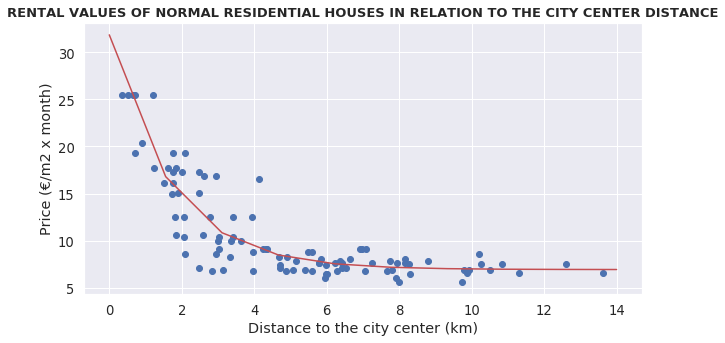

In [194]:
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

x_rn1 = residential_normal_average['Distance_from_center (km)']
y_rn1 = residential_normal_average['Avg_rental_value (€/m2 x month)']

p0 = (1.,1.e-5,1.) # starting search koefs
opt, pcov = curve_fit(model_func, x_rn1, y_rn1, p0)
a, k, b = opt

x2 = np.linspace(0, 14, 10)
y2 = model_func(x2, a, k, b)
fig, ax = plt.subplots(figsize=(10,5))

plt.rcParams.update({'font.size': 20})
ax.plot(x_rn1, y_rn1, 'bo', label='data with noise')
ax.plot(x2, y2, color='r', label='Fit. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b))

plt.title("RENTAL VALUES OF NORMAL RESIDENTIAL HOUSES IN RELATION TO THE CITY CENTER DISTANCE", weight='bold', size=13)
plt.xlabel('Distance to the city center (km)')
plt.ylabel('Price (€/m2 x month)')

### Create a new dataframe with only the data for stately houses

In [195]:
stately_average = house_info.loc[(house_info['Housing_type'] == 'Stately homes')]
stately_average.head()

,Neighborhoods,Borough code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Latitude,Longitude,Area,Avg_market_value (€/m2),Avg_rental_value (€/m2 x month),Distance_from_center (km)
2,DUOMO,B12,Stately homes,Excellent,11200,14300,37.5,46.0,45.464138,9.188555,B,12750.0,41.75,0.340760
5,SAN BABILA,B12,Stately homes,Excellent,11200,14300,37.5,46.0,45.466521,9.197529,B,12750.0,41.75,0.705394
8,MONTENAPOLEONE,B12,Stately homes,Excellent,11200,14300,37.5,46.0,45.470015,9.192868,B,12750.0,41.75,0.656158
11,MISSORI,B12,Stately homes,Excellent,11200,14300,37.5,46.0,45.459828,9.189555,B,12750.0,41.75,0.528621
14,CAIROLI,B12,Stately homes,Excellent,11200,14300,37.5,46.0,45.468701,9.181697,B,12750.0,41.75,1.209779


### Create the scatter plots

Text(37.59521539419934, 0.5, 'Price (€/m2)')

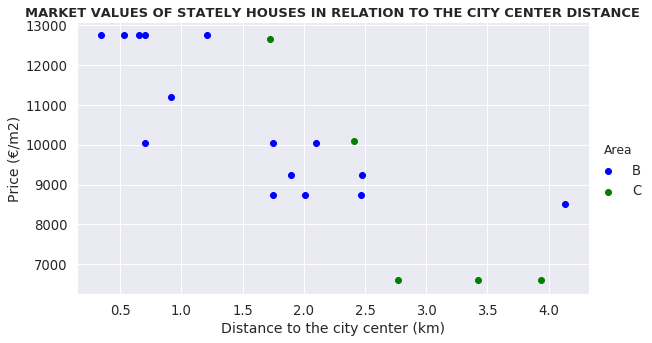

In [196]:
d = {'color': ['blue', 'green', 'yellow', 'red']}

sns.set(font_scale = 1.2)
fg = sns.FacetGrid(data=stately_average, hue='Area', hue_kws=d, height=5.0, aspect=1.7) 
plt.title("MARKET VALUES OF STATELY HOUSES IN RELATION TO THE CITY CENTER DISTANCE", weight='bold', size=13)
fg.map(plt.scatter, 'Distance_from_center (km)', 'Avg_market_value (€/m2)').add_legend()
plt.xlabel('Distance to the city center (km)', fontsize=14)
plt.ylabel('Price (€/m2)', fontsize=14)

Text(0, 0.5, 'Price (€/m2)')

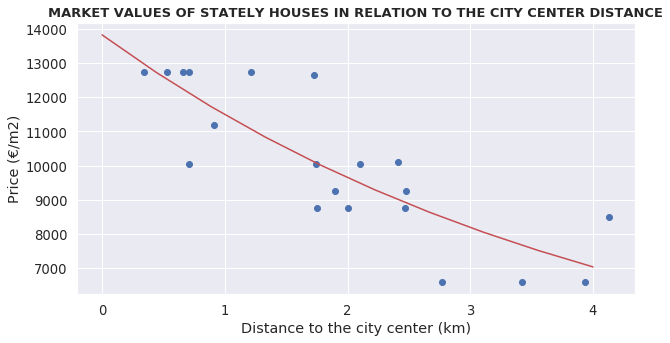

In [197]:
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

x_s = stately_average['Distance_from_center (km)']
y_s = stately_average['Avg_market_value (€/m2)']

p0 = (1.,1.e-8,1.) # starting search koefs
opt, pcov = curve_fit(model_func, x_s, y_s, p0)
a, k, b = opt

x2 = np.linspace(0, 4, 10)
y2 = model_func(x2, a, k, b)
fig, ax = plt.subplots(figsize=(10,5))

plt.rcParams.update({'font.size': 20})
ax.plot(x_s, y_s, 'bo', label='data with noise')
ax.plot(x2, y2, color='r', label='Fit. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b))

plt.title("MARKET VALUES OF STATELY HOUSES IN RELATION TO THE CITY CENTER DISTANCE", weight='bold', size=13)
plt.xlabel('Distance to the city center (km)')
plt.ylabel('Price (€/m2)')

Text(36.42410224060458, 0.5, 'Price (€/m2 x month)')

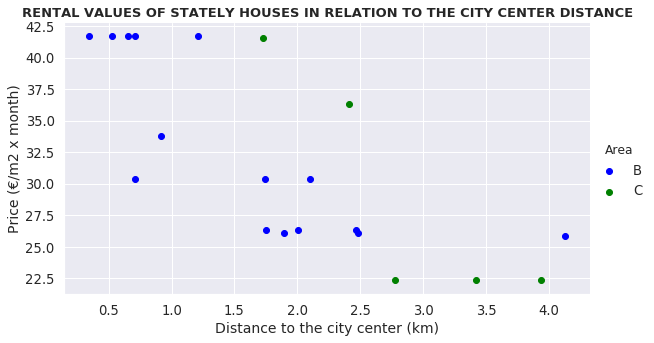

In [198]:
d = {'color': ['blue', 'green', 'yellow', 'red']}

sns.set(font_scale = 1.2)
fg = sns.FacetGrid(data=stately_average, hue='Area', hue_kws=d, height=5.0, aspect=1.7) 
plt.title("RENTAL VALUES OF STATELY HOUSES IN RELATION TO THE CITY CENTER DISTANCE", weight='bold', size=13)
fg.map(plt.scatter, 'Distance_from_center (km)', 'Avg_rental_value (€/m2 x month)').add_legend()
plt.xlabel('Distance to the city center (km)', fontsize=14)
plt.ylabel('Price (€/m2 x month)', fontsize=14)

Text(0, 0.5, 'Price (€/m2 x month)')

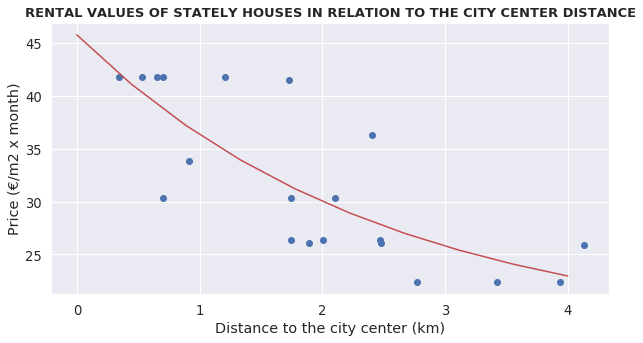

In [199]:
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

x_s1 = stately_average['Distance_from_center (km)']
y_s1 = stately_average['Avg_rental_value (€/m2 x month)']

p0 = (1.,1.e-8,1.) # starting search koefs
opt, pcov = curve_fit(model_func, x_s1, y_s1, p0)
a, k, b = opt

x2 = np.linspace(0, 4, 10)
y2 = model_func(x2, a, k, b)
fig, ax = plt.subplots(figsize=(10,5))

plt.rcParams.update({'font.size': 20})
ax.plot(x_s1, y_s1, 'bo', label='data with noise')
ax.plot(x2, y2, color='r', label='Fit. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b))

plt.title("RENTAL VALUES OF STATELY HOUSES IN RELATION TO THE CITY CENTER DISTANCE", weight='bold', size=13)
plt.xlabel('Distance to the city center (km)')
plt.ylabel('Price (€/m2 x month)')

## 3.5 Venues analysis <a name='venue_analysis'></a>

After determining the surrounding venues of the Milan neighborhoods, the latter have been divided in clusters, as to grouping them according to the more common venue types, in such a way that neighborhoods in the same group are more similar to each other than to those in other groups. To do that, K-means algorithm has been use. 

First of all we would add the borough code column to the dataframe of interest (neighborhoods_venues).

In [200]:
neighborhoods_venues = pd.merge(neighborhoods_venues, house_data1[['Neighborhoods', 'Borough code']], on='Neighborhoods')
neighborhoods_venues = neighborhoods_venues.drop_duplicates()
neighborhoods_venues.head()

,Neighborhoods,Latitude,Longitude,Venue_Name,Venue_Latitude,Venue_Longitude,Venue_Category,Borough code
0,DUOMO,45.464138,9.188555,Galleria Vittorio Emanuele II,45.465577,9.190024,Monument / Landmark,B12
3,DUOMO,45.464138,9.188555,Starbucks Reserve Roastery,45.464920,9.186153,Coffee Shop,B12
6,DUOMO,45.464138,9.188555,Piazza del Duomo,45.464190,9.189527,Plaza,B12
9,DUOMO,45.464138,9.188555,Room Mate Giulia Hotel,45.465250,9.189396,Hotel,B12
12,DUOMO,45.464138,9.188555,Terrazze del Duomo,45.464207,9.191075,Scenic Lookout,B12


Move borough code column next to neighborhoods columnm

In [201]:
Borough_code_columns = [neighborhoods_venues.columns[-1]] + list(neighborhoods_venues.columns[:-1])
neighborhoods_venues = neighborhoods_venues[Borough_code_columns]
neighborhoods_venues.head()

,Borough code,Neighborhoods,Latitude,Longitude,Venue_Name,Venue_Latitude,Venue_Longitude,Venue_Category
0,B12,DUOMO,45.464138,9.188555,Galleria Vittorio Emanuele II,45.465577,9.190024,Monument / Landmark
3,B12,DUOMO,45.464138,9.188555,Starbucks Reserve Roastery,45.464920,9.186153,Coffee Shop
6,B12,DUOMO,45.464138,9.188555,Piazza del Duomo,45.464190,9.189527,Plaza
9,B12,DUOMO,45.464138,9.188555,Room Mate Giulia Hotel,45.465250,9.189396,Hotel
12,B12,DUOMO,45.464138,9.188555,Terrazze del Duomo,45.464207,9.191075,Scenic Lookout


### Number of venues for each neighborhood

In [202]:
neighborhoods_venues.groupby('Neighborhoods').count().head()

,Borough code,Latitude,Longitude,Venue_Name,Venue_Latitude,Venue_Longitude,Venue_Category
Neighborhoods,,,,,,,
AFFORI,100,100,100,100,100,100,100
ARCO DELLA PACE,100,100,100,100,100,100,100
ARGONNE,100,100,100,100,100,100,100
ASCANIO SFORZA,100,100,100,100,100,100,100
BAUSAN,100,100,100,100,100,100,100


In [203]:
print('There are {} uniques categories.'.format(len(neighborhoods_venues['Venue_Category'].unique())))

There are 206 uniques categories.


In [204]:
neighborhoods_venues['Venue_Category'].unique()[:50]

array(['Monument / Landmark', 'Coffee Shop', 'Plaza', 'Hotel',
       'Scenic Lookout', 'Pizza Place', 'Ice Cream Shop', 'Art Gallery',
       'Opera House', 'Electronics Store', 'Boutique', 'Bistro',
       'Cocktail Bar', "Men's Store", 'Chocolate Shop', 'Café', 'Castle',
       'Hostel', 'Cupcake Shop', 'Park', 'Historic Site', 'Bookstore',
       'Museum', 'Fountain', 'Toy / Game Store', 'Theater',
       'Italian Restaurant', 'Sandwich Place', 'Department Store',
       'Sushi Restaurant', 'Restaurant', 'Salad Place', 'Church',
       'Art Museum', 'Bakery', 'Dessert Shop', 'Shoe Store', 'Gastropub',
       'Argentinian Restaurant', 'Trattoria/Osteria', 'Wine Bar',
       'Design Studio', 'Seafood Restaurant', 'Tram Station',
       'Snack Place', 'Vegetarian / Vegan Restaurant', 'Food Truck',
       'Japanese Restaurant', 'Roman Restaurant', 'Planetarium'],
      dtype=object)

### Analyze each neighborhoods

In [205]:
# one hot encoding
Milan_onehot = pd.get_dummies(neighborhoods_venues[['Venue_Category']], prefix="", prefix_sep="")

# add borough code and neighborhood column back to dataframe
Milan_onehot['Borough code'] = neighborhoods_venues['Borough code'] 
Milan_onehot['Neighborhoods'] = neighborhoods_venues['Neighborhoods'] 
Milan_onehot['Latitude'] = neighborhoods_venues['Latitude'] 
Milan_onehot['Longitude'] = neighborhoods_venues['Longitude'] 

# move borough code and neighborhood columsn to the first column
fixed_columns = list(Milan_onehot.columns[-4:]) + list(Milan_onehot.columns[:-4])
Milan_onehot = Milan_onehot[fixed_columns]

Milan_onehot.head()

,Borough code,Neighborhoods,Latitude,Longitude,Abruzzo Restaurant,Agriturismo,Airport,Airport Lounge,Airport Service,Airport Terminal,...,Trattoria/Osteria,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Wine Bar,Wine Shop,Winery
0,B12,DUOMO,45.464138,9.188555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B12,DUOMO,45.464138,9.188555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,B12,DUOMO,45.464138,9.188555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,B12,DUOMO,45.464138,9.188555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,B12,DUOMO,45.464138,9.188555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [206]:
Milan_grouped = Milan_onehot.groupby(["Borough code", "Neighborhoods", "Latitude", "Longitude"]).mean().reset_index()

print(Milan_grouped.shape)
Milan_grouped.head()

(101, 210)


,Borough code,Neighborhoods,Latitude,Longitude,Abruzzo Restaurant,Agriturismo,Airport,Airport Lounge,Airport Service,Airport Terminal,...,Trattoria/Osteria,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Wine Bar,Wine Shop,Winery
0,B12,CAIROLI,45.468701,9.181697,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.01,0.01
1,B12,MISSORI,45.459828,9.189555,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.02,0.00,0.00
2,B12,MONTENAPOLEONE,45.470015,9.192868,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.01,0.01
3,B12,SAN BABILA,45.466521,9.197529,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.03,0.00,0.00
4,B12,DUOMO,45.464138,9.188555,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.03,0.00,0.00


### Top 10 most common venues for each neighborhood

In [207]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['Borough code', 'Neighborhoods', 'Latitude', 'Longitude']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough code'] = Milan_grouped['Borough code']
neighborhoods_venues_sorted['Neighborhoods'] = Milan_grouped['Neighborhoods']
neighborhoods_venues_sorted['Latitude'] = Milan_grouped['Latitude']
neighborhoods_venues_sorted['Longitude'] = Milan_grouped['Longitude']

for ind in np.arange(Milan_grouped.shape[0]):
    row_categories = Milan_grouped.iloc[ind, :].iloc[4:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    neighborhoods_venues_sorted.iloc[ind, 4:] = row_categories_sorted.index.values[0:num_top_venues]

print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(101, 14)


,Borough code,Neighborhoods,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,B12,CAIROLI,45.468701,9.181697,Hotel,Plaza,Park,Boutique,Cocktail Bar,Monument / Landmark,Ice Cream Shop,Italian Restaurant,Pizza Place,Seafood Restaurant
1,B12,MISSORI,45.459828,9.189555,Cocktail Bar,Plaza,Hotel,Boutique,Park,Seafood Restaurant,Ice Cream Shop,Café,Pizza Place,Monument / Landmark
2,B12,MONTENAPOLEONE,45.470015,9.192868,Plaza,Hotel,Cocktail Bar,Ice Cream Shop,Boutique,Pizza Place,Monument / Landmark,Park,Italian Restaurant,Café
3,B12,SAN BABILA,45.466521,9.197529,Hotel,Plaza,Cocktail Bar,Boutique,Pizza Place,Ice Cream Shop,Park,Monument / Landmark,Café,Wine Bar
4,B12,DUOMO,45.464138,9.188555,Plaza,Hotel,Park,Cocktail Bar,Boutique,Monument / Landmark,Pizza Place,Wine Bar,Seafood Restaurant,Café


### Clustering Neighborhoods

<b> Finding the optimal number of clusters </b>

In order to try to determine the optimal number of clusters (k), two different methods are going to be used – the elbow method and the silhouette score. Both of the analyses will be run on a range between 2 and 9 clusters.

Let's start with the elbow method:

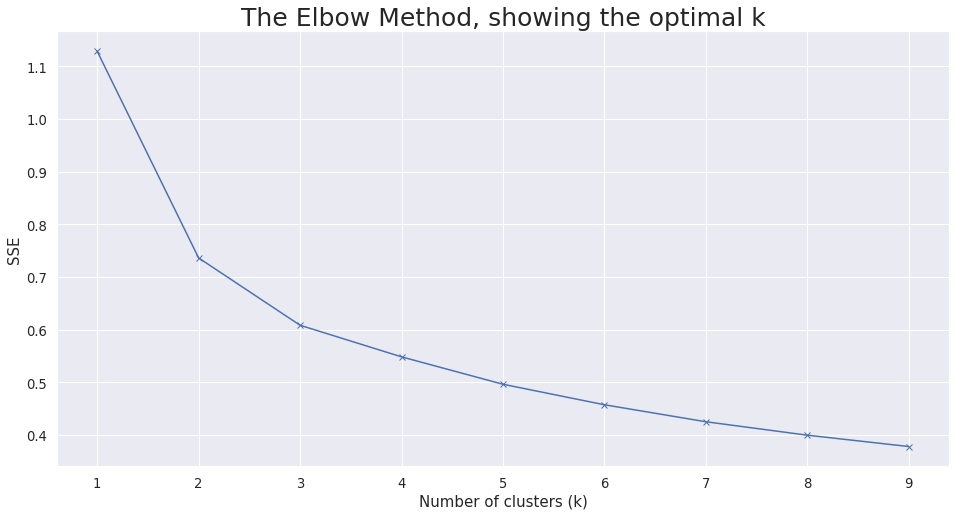

In [223]:
Milan_grouped_clustering = Milan_grouped.drop(["Borough code", "Neighborhoods", "Latitude", "Longitude"], 1)
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(Milan_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize=(16,8))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of clusters (k)", fontsize= 15)
plt.ylabel("SSE", fontsize= 15)
plt.title('The Elbow Method, showing the optimal k', fontsize= 25)
plt.grid(True)
plt.show()

A bend in the curve at k = 2 it's an indication that 2 the best number of clusters.

Let's try the silhouette method:

In [209]:
for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(Milan_grouped_clustering)
    centers = clusterer.cluster_centers_

    score = silhouette_score(Milan_grouped_clustering, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.32731147585194104)
For n_clusters = 3, silhouette score is 0.2639774305997771)
For n_clusters = 4, silhouette score is 0.23900029763094494)
For n_clusters = 5, silhouette score is 0.25548910956998644)
For n_clusters = 6, silhouette score is 0.2011800979734249)
For n_clusters = 7, silhouette score is 0.21381469618478638)
For n_clusters = 8, silhouette score is 0.19308687256242196)
For n_clusters = 9, silhouette score is 0.20002689805844748)


The silhouette method confirm that the optimal number of clusters for the dataset is k = 2, since it has the highest score.

In [210]:
# set number of clusters
kclusters = 2

Milan_grouped_clustering = Milan_grouped.drop(["Borough code", "Neighborhoods", "Latitude", "Longitude"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Milan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

### Add cluster_lable column to Milan_merged dataframe 

In [211]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.sort_values(by=['Cluster Labels'], inplace=True)
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(101, 15)


,Cluster Labels,Borough code,Neighborhoods,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,B12,CAIROLI,45.468701,9.181697,Hotel,Plaza,Park,Boutique,Cocktail Bar,Monument / Landmark,Ice Cream Shop,Italian Restaurant,Pizza Place,Seafood Restaurant
33,0,C18,ASCANIO SFORZA,45.437966,9.174904,Cocktail Bar,Hotel,Art Gallery,Seafood Restaurant,Park,Plaza,Italian Restaurant,Café,Bakery,Pizza Place
34,0,C18,P.TA GENOVA,45.456665,9.174606,Plaza,Hotel,Cocktail Bar,Ice Cream Shop,Boutique,Art Gallery,Park,Café,Seafood Restaurant,Pizza Place
35,0,C18,SOLARI,45.459023,9.164888,Plaza,Hotel,Cocktail Bar,Seafood Restaurant,Ice Cream Shop,Park,Art Gallery,Café,Italian Restaurant,Monument / Landmark
36,0,C19,SARFATTI,45.448059,9.186987,Cocktail Bar,Hotel,Art Gallery,Seafood Restaurant,Plaza,Monument / Landmark,Boutique,Park,Café,Japanese Restaurant


### Visualize the resulting clusters

In [212]:
map_clusters = folium.Map(location=[lat, lon], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

def color(cluster): 
    if cluster == 0: 
        col_= 'green'
    else: 
        col_='orange'
    return col_

# add markers to the map
markers_colors = []
for lat, lon, b_code, neigh, cluster in zip(neighborhoods_venues_sorted['Latitude'], neighborhoods_venues_sorted['Longitude'], neighborhoods_venues_sorted['Borough code'], neighborhoods_venues_sorted['Neighborhoods'], neighborhoods_venues_sorted['Cluster Labels']):
    label = folium.Popup('{} (Borough code: {}) - Cluster {}'.format(neigh, b_code, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color= color(cluster),
        parse_html=False, legend_name='SCALE',
        fill=True,
        fill_opacity=0.8).add_to(map_clusters)

legend_html = '''
    <div style="position: fixed;  
        bottom: 10px; left: 10px; width: 100px; height: 70px; 
        border:2px solid grey; z-index:9999; font-size:11px;">&nbsp; Legend <br>
        &nbsp; <b> Cluster 1 </b> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
        &nbsp; <b> Cluster 2 </b> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:orange"></i><br>
    </div>
    '''
map_clusters.get_root().html.add_child(folium.Element(legend_html))
       
map_clusters

### Examine Clusters

<u><b> cluster 1: </b></u>

In [213]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 0, neighborhoods_venues_sorted.columns[[1] + list(range(5, neighborhoods_venues_sorted.shape[1]))]]

,Borough code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,B12,Hotel,Plaza,Park,Boutique,Cocktail Bar,Monument / Landmark,Ice Cream Shop,Italian Restaurant,Pizza Place,Seafood Restaurant
33,C18,Cocktail Bar,Hotel,Art Gallery,Seafood Restaurant,Park,Plaza,Italian Restaurant,Café,Bakery,Pizza Place
34,C18,Plaza,Hotel,Cocktail Bar,Ice Cream Shop,Boutique,Art Gallery,Park,Café,Seafood Restaurant,Pizza Place
35,C18,Plaza,Hotel,Cocktail Bar,Seafood Restaurant,Ice Cream Shop,Park,Art Gallery,Café,Italian Restaurant,Monument / Landmark
36,C19,Cocktail Bar,Hotel,Art Gallery,Seafood Restaurant,Plaza,Monument / Landmark,Boutique,Park,Café,Japanese Restaurant
37,C19,Ice Cream Shop,Hotel,Cocktail Bar,Plaza,Café,Monument / Landmark,Boutique,Italian Restaurant,Coffee Shop,Art Gallery
39,D10,Ice Cream Shop,Hotel,Cocktail Bar,Boutique,Italian Restaurant,Art Gallery,Pizza Place,Café,Pub,Plaza
41,D12,Cocktail Bar,Hotel,Plaza,Pizza Place,Ice Cream Shop,Boutique,Monument / Landmark,Art Gallery,Dessert Shop,Park
42,D12,Hotel,Cocktail Bar,Ice Cream Shop,Boutique,Pizza Place,Plaza,Monument / Landmark,Bakery,Art Gallery,Japanese Restaurant
43,D12,Ice Cream Shop,Plaza,Hotel,Cocktail Bar,Italian Restaurant,Boutique,Pizza Place,Park,Art Gallery,Monument / Landmark


<u><b> Cluster 2: </b></u>

In [214]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 1, neighborhoods_venues_sorted.columns[[1] + list(range(5, neighborhoods_venues_sorted.shape[1]))]]

,Borough code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,D35,Italian Restaurant,Pizza Place,Ice Cream Shop,Dessert Shop,Hotel,Café,Japanese Restaurant,Gym / Fitness Center,Sushi Restaurant,Cocktail Bar
84,D35,Italian Restaurant,Ice Cream Shop,Cocktail Bar,Café,Hotel,Boutique,Dessert Shop,Art Gallery,Pizza Place,Park
82,D34,Ice Cream Shop,Italian Restaurant,Hotel,Park,Pizza Place,Cocktail Bar,Café,Sushi Restaurant,Coffee Shop,Boutique
81,D34,Italian Restaurant,Pizza Place,Ice Cream Shop,Café,Hotel,Cocktail Bar,Art Gallery,Dessert Shop,Brewery,Pub
85,D35,Italian Restaurant,Pizza Place,Dessert Shop,Hotel,Café,Ice Cream Shop,Japanese Restaurant,Gym / Fitness Center,Sandwich Place,Gym
94,E6,Ice Cream Shop,Italian Restaurant,Park,Café,Pub,Seafood Restaurant,Sushi Restaurant,Hotel,Pizza Place,Supermarket
98,E7,Italian Restaurant,Restaurant,Supermarket,Hotel,Pizza Place,Tram Station,Clothing Store,Electronics Store,Theater,Chinese Restaurant
90,E5,Italian Restaurant,Pizza Place,Restaurant,Park,Café,Supermarket,Japanese Restaurant,Bakery,Shoe Store,Brewery
91,E5,Supermarket,Italian Restaurant,Pizza Place,Restaurant,Furniture / Home Store,Pool,Bakery,Park,Steakhouse,Japanese Restaurant
92,E5,Italian Restaurant,Park,Pizza Place,Café,Ice Cream Shop,Japanese Restaurant,Restaurant,Gym / Fitness Center,Sporting Goods Shop,Bakery


### Representing the top 10 venues for each cluster and calculate the %

First of all we have to associate the borough code and the related venue categories with the cluster label.

In [215]:
neighborhoods_clusters_venues = pd.merge(neighborhoods_venues, neighborhoods_venues_sorted[['Cluster Labels', 'Neighborhoods']], on='Neighborhoods')
neighborhoods_clusters_venues = neighborhoods_clusters_venues.drop(['Latitude', 'Longitude', 'Venue_Name', 'Venue_Latitude', 'Venue_Longitude'], axis=1)
neighborhoods_clusters_venues.head()

,Borough code,Neighborhoods,Venue_Category,Cluster Labels
0,B12,DUOMO,Monument / Landmark,0
1,B12,DUOMO,Coffee Shop,0
2,B12,DUOMO,Plaza,0
3,B12,DUOMO,Hotel,0
4,B12,DUOMO,Scenic Lookout,0


Now, we find how many times each venue category occurs.

In [216]:
neighborhoods_clusters = neighborhoods_clusters_venues.groupby(by=['Cluster Labels', 'Venue_Category'])['Venue_Category'].count()
neighborhoods_clusters = neighborhoods_clusters.to_frame(name='Frequency').reset_index()
neighborhoods_clusters.sort_values(['Cluster Labels', 'Frequency'], ascending=[True, False]).head()

,Cluster Labels,Venue_Category,Frequency
60,0,Hotel,454
27,0,Cocktail Bar,435
84,0,Plaza,404
61,0,Ice Cream Shop,325
12,0,Boutique,278


and then we calculate the % for each venue category of both clusters.

In [217]:
neighborhoods_clusters_0 = neighborhoods_clusters[neighborhoods_clusters['Cluster Labels']==0]
neighborhoods_clusters_0 ['%'] = round(neighborhoods_clusters_0['Frequency']/neighborhoods_clusters_0['Frequency'].sum()*100,1)
neighborhoods_clusters_0 = neighborhoods_clusters_0.sort_values('%', ascending=False)
neighborhoods_clusters_0 = neighborhoods_clusters_0.reset_index(drop=True).head(10)
neighborhoods_clusters_0 = neighborhoods_clusters_0.drop(['Cluster Labels', 'Frequency'], 1)
neighborhoods_clusters_0

,Venue_Category,%
0,Hotel,7.1
1,Cocktail Bar,6.8
2,Plaza,6.3
3,Ice Cream Shop,5.1
4,Boutique,4.3
5,Park,4.0
6,Monument / Landmark,3.4
7,Italian Restaurant,3.3
8,Pizza Place,3.3
9,Café,3.2


In [218]:
neighborhoods_clusters_1 = neighborhoods_clusters[neighborhoods_clusters['Cluster Labels']==1]
neighborhoods_clusters_1 ['%'] = round(neighborhoods_clusters_1['Frequency']/neighborhoods_clusters_1['Frequency'].sum()*100,1)
neighborhoods_clusters_1 = neighborhoods_clusters_1.sort_values('%', ascending=False)
neighborhoods_clusters_1 = neighborhoods_clusters_1.reset_index(drop=True).head(10)
neighborhoods_clusters_1.drop(['Cluster Labels', 'Frequency'], 1)

,Venue_Category,%
0,Italian Restaurant,10.7
1,Pizza Place,5.6
2,Ice Cream Shop,5.3
3,Park,4.8
4,Café,4.5
5,Hotel,4.3
6,Supermarket,2.6
7,Dessert Shop,2.6
8,Japanese Restaurant,2.4
9,Cocktail Bar,2.3


now we can create the barh plots.

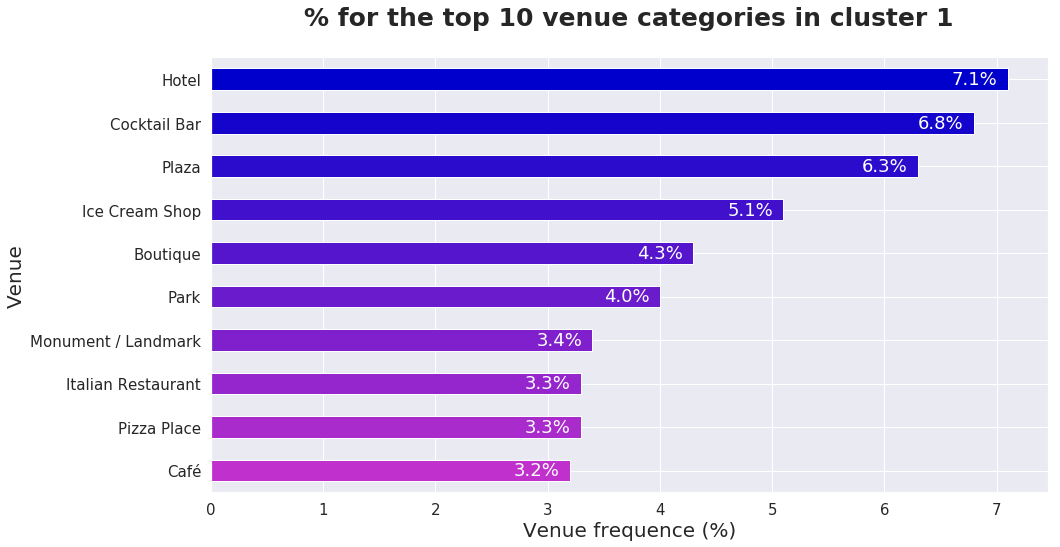

In [219]:
customcmap = [(x/12.0,  x/48.0, 0.8) for x in range(len(neighborhoods_clusters_0))]

ax = neighborhoods_clusters_0.plot(kind='barh', x='Venue_Category', y='%', color=customcmap, figsize=(15, 8), fontsize=15, legend=False) 
plt.xlabel('Venue frequence (%)', fontsize=20)
plt.ylabel('Venue', fontsize=20)
ttl = plt.title('% for the top 10 venue categories in cluster 1', fontsize=25, weight='bold')
ttl.set_position([.5, 1.06])
ax.invert_yaxis()

ctb = LinearSegmentedColormap.from_list('custombar', customcmap, N=2048)
sm = plt.cm.ScalarMappable(cmap=ctb)

for i, (p, pr) in enumerate(zip( neighborhoods_clusters_0['Venue_Category'], neighborhoods_clusters_0["%"])):
    plt.text(s=str(pr)+"%", x=pr-0.5, y=i, color="w",verticalalignment="center", horizontalalignment="left", size=18)

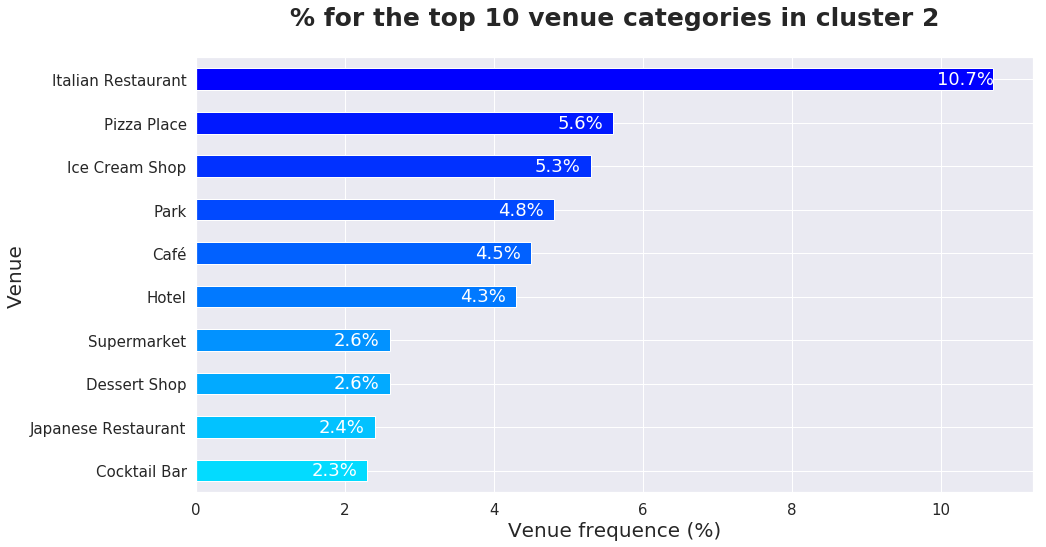

In [220]:
customcmap = [(x/900.5,  x/10.5, 1) for x in range(len(neighborhoods_clusters_1))]

ax = neighborhoods_clusters_1.plot(kind='barh', x='Venue_Category', y='%', color=customcmap, figsize=(15, 8), fontsize=15, legend=False) 
plt.xlabel('Venue frequence (%)', fontsize=20)
plt.ylabel('Venue', fontsize=20)
ttl = plt.title('% for the top 10 venue categories in cluster 2', fontsize=25, weight='bold')
ttl.set_position([.5, 1.06])
ax.invert_yaxis()

ctb = LinearSegmentedColormap.from_list('custombar', customcmap, N=2048)
sm = plt.cm.ScalarMappable(cmap=ctb)

for i, (p, pr) in enumerate(zip( neighborhoods_clusters_1['Venue_Category'], neighborhoods_clusters_1["%"])):
    plt.text(s=str(pr)+"%", x=pr-0.75, y=i, color="w",verticalalignment="center", horizontalalignment="left", size=18)

# 5. Discussion <a name='discussion'></a>

This analysis revealed some important aspects to take into account when someone decides to buy or to rent a house in Milan and they don’t know in which neighborhood go to live. <br/>
First of all, the house price is one the main factors that affects the house choice. It’s good to know which Milan areas have house prices in line with the budget of the subject: this will allow him to refine its choice and optimize the time of house research. For example, a person who intends to invest a large sum of money could focus to the house for sale/rent localized in B and C areas (the most expensive but, obviously, the most prestigious ones). On the contrary, a person that plans to spend relatively small amount of money can focus on the house located in D and E areas (the most distant to the city center but, at the same time, the most affordable ones). <br/>
However, it’s important to considerate the state of the house: indeed, a house located in the same Milan areas but in different condition will have a different price. Certainly, a stately house is dearer that a residential house in excellent condition; this last one, in turn, is less convenient that a residential house in normal condition. It’s better to have a clear idea about the condition of the house that it’s looking for, because this aspect may greatly affect the house value. 
However, if this is not enough and someone wants to focus the attention on a smaller group of choice, they could consider the distance beyond which the price is no longer in line with the predefined budget, this will allow them to select the more aligned neighborhoods. In general, there is a rapid decrease of the market/rental values of the residential house, until a distance of 4 km from the city center, then the price decrease more slowly (beyond 4 km only neighborhoods belonging to D and E areas are present). <br/>
Different situation occurs for the stately houses, indeed the values decrease in a more uniform way. <br/>
Someone who want to buy or to rent a house in Milan would do well to choose the best neighborhoods to live also according to their interests. This will ensure less use of the car and the public transport, therefore less stress. <br/>
This study has found out that Milan neighborhoods can be split in 2 clusters: the first one includes the neighborhoods closer to the city center and the second one the neighborhoods located in the suburbs. <br/>
It has been observed that cluster 1 is rich in hotels, attractive plazas, boutiques, monuments, Italian restaurants, art galleries, etc.: all venues that attract tourists and people who love art. Cluster 2, on the other hand, includes many places that serving food and drinks, in addition to park, hotels, etc. The neighborhoods belonging to this cluster are the perfect ones for people that live in Milan and don’t give up enjoying social life. <br/>
Finally, it is possible to notice that in general Milan, even if it is a metropolis, is rich in parks. This is an important aspect, since it’s able to offer enjoyment to those who appreciate outdoors life and for people who have dogs. <br/>

What could be done better? <br/>
This project only considers 2 aspects that could affect the neighborhood choice i.e. house value and the proximity to the venues of interests. However, there are many more characteristics that may come into play, like the presence of public transports (it’s well known that traffic on the roads of big city is particularly heavy) or the availability of the houses themselves. Future research could develop a methodology that allows to consider more aspects. <br/>
In addition, this project has been made by the use of Foursquare API Sandbox Tier Developer account that has limitation on the number of API call (in this case 100 for each neighborhood), this could have been affected the real venue frequencies. In the future this problem may be bypassed using a paid account. <br/>
Finally, it would be interesting to split the Milan neighborhoods in more than 2 clusters, as to improve the differentiation of the neighborhoods according to the venue frequencies. However, this would affect the K-means precision. 

# 6. Conclusion <a name='conclusion'></a>

This project has been intended as a tool to help people who intend to buy or to rent a house in Milan, as to facilitate the choice concerning the place where focus the house research. </br>
First of all, data has been collected from the Italian Revenue Agency website, all the neighborhoods have been geolocated (by using Google Maps Geocoding API) and then mapped to determinate the exact position. Subsequently, the data were analyzed, as to determinate the correlation between the house location (Milan area and neighborhood) and the related price, also depending on the state of the home, and the most frequent venues that are present (by using Foursquare API). </br>
It has been possible, on the whole, to find satisfactory answers to the question cornerstone of this study. Indeed, based on these findings, I can conclude that there is a positive correlation between the house prices and the proximity to the city center; moreover, it has been possible to split the neighborhoods in different clusters, depending on the venue frequencies, and so determine the differences among them. </br>
Obviously, there may be other variables at play that also contribute to the house choice. However, it is something that could help someone during the decision process of the future house location.

## Word Cloud

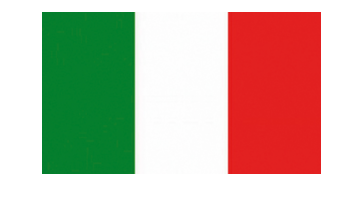

In [221]:
!wget --quiet https://www.tuttobarche.it/accessori-nautica/data/thumb_cache/_data_prod_img_bandiera-italia_jpg_cr_600_350.jpg
flag_mask = np.array(Image.open('_data_prod_img_bandiera-italia_jpg_cr_600_350.jpg'))

fig = plt.figure()
fig.set_figwidth(5) # set width
fig.set_figheight(10) # set height
plt.imshow(flag_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 432x288 with 0 Axes>

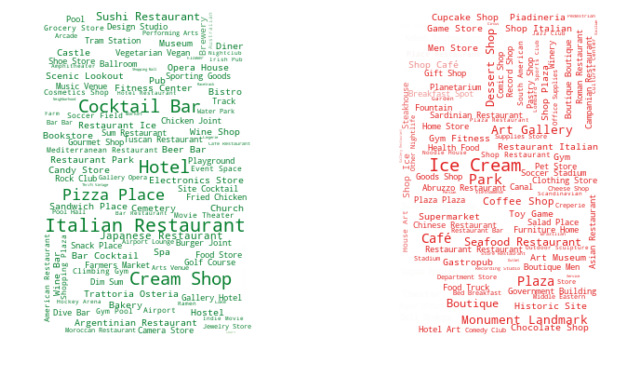

In [222]:
text = str(neighborhoods_venues['Venue_Category'])
wordcloud = WordCloud(background_color='white', max_words=500, mask=flag_mask, stopwords=STOPWORDS, mode="RGBA", max_font_size=100, width=1000, height=1000)
image_colors = ImageColorGenerator(flag_mask)
# generate the word cloud
wordcloud.generate(text)
# display the word cloud
fig = plt.figure()
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()